# 🚀VERİ ANALİZİ RAPORU: HCI Digital Life Survey 2025

## Veri Seti Girişi ve Analiz Amacı

Bu çalışma, **Human Clarity Institute (HCI)** tarafından 2025 yılında toplanan **Dijital Yaşam Anketi** verilerine dayanmaktadır. Temel amaç, modern dijital dünyanın, bireylerin psikolojik durumu, davranış kalıpları ve sosyal güven algıları üzerindeki etkilerini kantitatif (sayısal) yöntemlerle incelemektir.

Veri setindeki gözlemler, katılımcıların günlük teknoloji kullanım sürelerinden yapay zeka (AI) hakkındaki endişelerine, çevrimiçi içerik güveninden istihdam durumlarına kadar geniş bir yelpazede bilgi sunmaktadır.

### 🎯 Projenin Temel Analitik Odak Noktaları

Bu analizi yürütürken aşağıdaki ana temalar ve sorulara odaklanılmıştır:

1.  **Dijital Refah ve Bağımlılık (Regret):**
    * Günlük çevrimiçi kalma süresi (`avg_daily_hours_online_numeric`) ile bu süreden duyulan pişmanlık (`Regret`) arasında nasıl bir ilişki vardır?
    * Bu pişmanlık düzeyi, yaş grupları arasında farklılık gösteriyor mu?

2.  **Dijital Yorgunluk (Digital Fatigue):**
    * Online geçirilen sürenin artması, bireylerin gün sonunda hissettiği enerji seviyesini (`post_online_energy_numeric`) nasıl etkilemektedir?

3.  **Güven ve Algı:**
    * Büyük Teknoloji şirketlerine duyulan kurumsal güven, içerik güvenini (Örn: Değerlerle uyum) ne ölçüde etkilemektedir?
    * Kullanıcıların en az güvendiği içerik türleri, onların ortalama online saatlerini nasıl etkiliyor?

4.  **Veri Kalitesi ve Denge Kontrolü:**
    * Analiz ve modelleme aşamasına geçmeden önce, veri setinin demografik değişkenler (Yaş Grubu, Cinsiyet, İstihdam Durumu) açısından dengeli (`balanced`) olup olmadığını tespit etmek. 

Bu rapor, titizlikle uygulanan temizlik ve ön işleme adımlarının ardından, EDA (Keşifsel Veri Analizi) ile elde edilen kritik analitik kanıtları ve çıkarımları sunmaktadır.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Kütüphaneler başarıyla yüklendi!")

✅ Kütüphaneler başarıyla yüklendi!


In [4]:
file_path = "/kaggle/input/hci-2025-digital-life-survey/HCI_2025_DigitalLifeSurvey_public.csv"
df = pd.read_csv(file_path)
print(f"✅ VERİ GERİ YÜKLENDİ! Satır: {df.shape[0]}, Sütun: {df.shape[1]},Toplam gözlem: {df.shape[0] * df.shape[1]}")
print(f"💾 Sonraki kayıpları önlemek için şimdi backup al:")
df_backup = df.copy()
print(f"📦 Backup oluşturuldu: 'df_backup' değişkeninde")

✅ VERİ GERİ YÜKLENDİ! Satır: 1003, Sütun: 45,Toplam gözlem: 45135
💾 Sonraki kayıpları önlemek için şimdi backup al:
📦 Backup oluşturuldu: 'df_backup' değişkeninde


## 📂 Veri Setinin Yüklenmesi ve Yedeklenmesi

Bu adımda veri seti CSV dosyasından **sıfırdan** yüklenmektedir.  
Veri kaybı riskine karşı, yüklenen veri setinin bir **yedek kopyası** oluşturulur.

- `pd.read_csv()` ile veri içe aktarılır  
- `df.shape` ile satır ve sütun sayısı kontrol edilir  
- `df.copy()` ile güvenli bir yedek alınır  

Bu yaklaşım, veri temizleme ve dönüşüm adımlarında hatalı işlemlerden geri dönmeyi kolaylaştırır.


In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 45 columns):
 #   Column                                                                                                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                         --------------  ----- 
 0   Do you consent to participate in this study?                                                                                                                                                                                                                   1003 non-null   object
 1   Column 3                               

## 🧾 Veri Setinin Yapısal İncelemesi

Bu bölümde veri setinin yapısal özellikleri incelenmektedir.

`df.info()` fonksiyonu kullanılarak:
- Sütun isimleri
- Veri tipleri
- Eksik olmayan gözlem sayıları
- Bellek kullanımı

tek bir çıktı üzerinden analiz edilmiştir.
Bu yaklaşım, sütunları ayrı ayrı yazdırmaktan daha sade ve etkilidir.


In [7]:
display(df.head())  # İlk 5satır
display(df.tail(5))  # Son 5 satır


,Do you consent to participate in this study?,Column 3,What is your gender?,What best describes your primary daily activity?,Which country/region do live in?,"On average, how many hours do you spend online each day? (self-estimate)","On days when you spend more than 4 hours online, how would you describe your energy afterward?",What's one word that best describes how you feel after long periods online?,What's one word that describes a positive feeling you get from being online?,What’s one word that best describes how you feel after regretting time spent online?,...,Completed at,Reviewed at,Archived at,Age,Sex,Ethnicity simplified,Country of residence,Nationality,Language,Employment status
0,"Yes, i consent",45 - 54,Female,Work,USA,9 - 10 hours,Neutral,Tired,Informed,Saddened,...,2025-09-09T22:07:37.368000Z,NaN,2025-09-09T22:07:37.769223Z,53,Female,Black,United States,United States,English,DATA_EXPIRED
1,"Yes, i consent",45 - 54,Female,Work,"United Kingdom, West Midlands",7 - 8 hours,Neutral,calm,engaged,listless,...,2025-09-09T22:07:56.940000Z,NaN,2025-09-09T22:07:57.327857Z,54,Female,White,United Kingdom,United Kingdom,English,Part-Time
2,"Yes, i consent",25 - 34,Male,Work,USA,Less than 2 hours,Tired,Drained,Active,Guilt,...,2025-09-09T22:08:38.086000Z,NaN,2025-09-09T22:08:38.495280Z,26,Male,White,United States,United States,English,Full-Time
3,"Yes, i consent",25 - 34,Female,Work,NaN,9 - 10 hours,Neutral,Normal,Community,Wasting time,...,2025-09-09T22:08:41.042000Z,NaN,2025-09-09T22:08:41.452258Z,34,Female,White,United Kingdom,Hungary,English,DATA_EXPIRED
4,"Yes, i consent",35 - 44,Male,Work,"London, England",5 - 6 hours,Neutral,Informed,Satisfied,down,...,2025-09-09T22:08:50.209000Z,NaN,2025-09-09T22:08:50.601787Z,41,Male,White,United Kingdom,United Kingdom,English,Full-Time


,Do you consent to participate in this study?,Column 3,What is your gender?,What best describes your primary daily activity?,Which country/region do live in?,"On average, how many hours do you spend online each day? (self-estimate)","On days when you spend more than 4 hours online, how would you describe your energy afterward?",What's one word that best describes how you feel after long periods online?,What's one word that describes a positive feeling you get from being online?,What’s one word that best describes how you feel after regretting time spent online?,...,Completed at,Reviewed at,Archived at,Age,Sex,Ethnicity simplified,Country of residence,Nationality,Language,Employment status
998,"Yes, i consent",35 - 44,Male,Work,"USA, Illionis",2 - 4 hours,Energized,Tired,Smart,Angry,...,2025-09-10T00:02:04.891000Z,NaN,2025-09-10T00:02:05.321047Z,37,Male,White,United States,United States,English,Full-Time
999,"Yes, i consent",35 - 44,Female,Work,United States of America,7 - 8 hours,Neutral,Neutral,Energized,Disengaged,...,2025-09-10T00:02:41.707000Z,NaN,2025-09-10T00:02:42.997663Z,38,Female,White,United States,United States,English,Full-Time
1000,"Yes, i consent",35 - 44,Female,Work,Canada,5 - 6 hours,Neutral,tired,happy,guilt,...,2025-09-10T00:06:13.527000Z,NaN,2025-09-10T00:06:15.918947Z,41,Female,Asian,Canada,Canada,English,Full-Time
1001,"Yes, i consent",18 - 24,Male,Unemployed,United States,More than 12 hours,Neutral,calm,joy,disappointed,...,2025-09-10T00:07:14.664000Z,NaN,2025-09-10T00:07:15.053595Z,22,Male,White,United States,United States,English,DATA_EXPIRED
1002,"Yes, i consent",35 - 44,Female,Other,Uk,5 - 6 hours,Neutral,Tired,Engaged,Stressed,...,2025-09-10T00:07:37.281000Z,NaN,2025-09-10T00:07:37.764732Z,36,Female,White,United Kingdom,United Kingdom,English,Part-Time


## 🔍 Veri Setine İlk Bakış

Bu bölümde veri setinin genel yapısı incelenmektedir:

- İlk birkaç satır ile veri formatı gözlemlenir  
- Temel istatistikler kullanılarak sayısal sütunların dağılımı analiz edilir  

Bu adım, veri temizleme ve ön işleme sürecinden önce
veriyi tanımak amacıyla yapılmaktadır.


In [8]:
# Sadece eksik değeri olan sütunları içeren Seriyi al
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Eksiklik yüzdesini hesapla
missing_percentage = (missing_data / len(df)) * 100

# Sonuçları DataFrame'de birleştir ve yüzdeliğe göre sırala
missing_summary = pd.DataFrame({
    'Eksik Sayısı': missing_data,
    'Eksik Yüzdesi (%)': missing_percentage.round(2)
}).sort_values(by='Eksik Yüzdesi (%)', ascending=False)


display(missing_summary)

,Eksik Sayısı,Eksik Yüzdesi (%)
Reviewed at,1002,99.9
"If you could change one thing about your digital life to improve your wellbeing, what would it be?",10,1.0
Completed at,10,1.0
Archived at,10,1.0
What’s one word that best describes how you feel after regretting time spent online?,5,0.5
"The Human Aware Institute studies how modern digital life affects people’s focus, energy, trust, and wellbeing. What’s one topic or struggle in your digital life that you would like to see us explore in a future report? Please be as specific as possible",4,0.4
"If you discovered that content you were engaging with was generated by AI rather than a real person, what’s one word that best describes how you would feel?",3,0.3
What’s one positive change digital technology or AI has brought to your life?,3,0.3
Which country/region do live in?,2,0.2
Think of a moment when you regretted how you spent your time online. Which of the following activities would you have preferred to do instead? (Select up to 3),2,0.2


## 🧩 Eksik Değer Analizi

Bu adımda veri setindeki her sütun için eksik (NaN) değer sayısı
hesaplanmaktadır.

Amaç:
- Eksik veri içeren sütunları tespit etmek  
- Veri temizleme stratejisine karar vermek  

Sadece eksik değeri bulunan sütunlar gösterilerek
çıktının daha okunabilir olması sağlanmıştır.


In [9]:
# Sütun adlarını temizleme: özel karakterleri kaldır, boşlukları alt çizgiye çevir ve küçük harf yap.
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', ' ', regex=True).str.strip().str.lower().str.replace(' ', '_')
display(df.head())

,do_you_consent_to_participate_in_this_study,column_3,what_is_your_gender,what_best_describes_your_primary_daily_activity,which_country_region_do__live_in,on_average__how_many_hours_do_you_spend_online_each_day___self_estimate,on_days_when_you_spend_more_than_4_hours_online__how_would_you_describe_your_energy_afterward,what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online,what_s_one_word_that_describes_a_positive_feeling_you_get_from_being_online,what_s_one_word_that_best_describes_how_you_feel_after_regretting_time_spent_online,...,completed_at,reviewed_at,archived_at,age,sex,ethnicity_simplified,country_of_residence,nationality,language,employment_status
0,"Yes, i consent",45 - 54,Female,Work,USA,9 - 10 hours,Neutral,Tired,Informed,Saddened,...,2025-09-09T22:07:37.368000Z,NaN,2025-09-09T22:07:37.769223Z,53,Female,Black,United States,United States,English,DATA_EXPIRED
1,"Yes, i consent",45 - 54,Female,Work,"United Kingdom, West Midlands",7 - 8 hours,Neutral,calm,engaged,listless,...,2025-09-09T22:07:56.940000Z,NaN,2025-09-09T22:07:57.327857Z,54,Female,White,United Kingdom,United Kingdom,English,Part-Time
2,"Yes, i consent",25 - 34,Male,Work,USA,Less than 2 hours,Tired,Drained,Active,Guilt,...,2025-09-09T22:08:38.086000Z,NaN,2025-09-09T22:08:38.495280Z,26,Male,White,United States,United States,English,Full-Time
3,"Yes, i consent",25 - 34,Female,Work,NaN,9 - 10 hours,Neutral,Normal,Community,Wasting time,...,2025-09-09T22:08:41.042000Z,NaN,2025-09-09T22:08:41.452258Z,34,Female,White,United Kingdom,Hungary,English,DATA_EXPIRED
4,"Yes, i consent",35 - 44,Male,Work,"London, England",5 - 6 hours,Neutral,Informed,Satisfied,down,...,2025-09-09T22:08:50.209000Z,NaN,2025-09-09T22:08:50.601787Z,41,Male,White,United Kingdom,United Kingdom,English,Full-Time


## 🧹 Sütun Adlarının Temizlenmesi

Bu adımda veri setindeki sütun adları analiz ve modelleme sürecine
uygun hâle getirilmiştir.

Uygulanan işlemler:
- Özel karakterler kaldırıldı  
- Boşluklar alt çizgi (`_`) ile değiştirildi  
- Tüm sütun adları küçük harfe dönüştürüldü  

Bu işlem, sütunlara kod içerisinde daha güvenli ve tutarlı
şekilde erişebilmek için **tek seferlik** uygulanmalıdır.


In [10]:


total_rows = len(df)
null_counts = df.isnull().sum()
missing_rate = null_counts / total_rows


highly_missing_cols = missing_rate[missing_rate > 0.99].index.tolist()

# 2. Sıfır/Düşük Varyanslı Sütunlar (Tüm değerleri aynı veya tek bir tekil değer)
zero_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]

manual_admin_cols = [
    'column_3',                                            
    'started_at',                                          
    'completed_at',                                        
    'archived_at',                                         
    'do_you_consent_to_participate_in_this_study',
]

# Önceki analizlerden bildiğimiz ve mutlaka kaldırılması gereken sütunu manuel ekleyelim.
if 'reviewed_at' not in highly_missing_cols:
     manual_admin_cols.append('reviewed_at')


# Tüm kaldırılacak sütunları tek bir listede toplama (Tekrarları önlemek için set kullanılır)
columns_to_drop_final = list(set(highly_missing_cols + zero_variance_cols + manual_admin_cols))


print(" Veri Temizleme Önceliği: Kaldırılması Gereken Sütunlar ")
print("-------------------------------------------------------------------")
print(f"Kaldırılacak Sütun Sayısı: **{len(columns_to_drop_final)}**\n")

print("### Kaldırılma Nedeni ve Sütunlar")
print("\n**1. Aşırı Eksik/Boş Sütunlar (Analitik Değeri Sıfır)**")
if highly_missing_cols:
    for col in highly_missing_cols:
        print(f"* **{col}**: Eksiklik oranı > %99.")
else:
    print("* Otomatik tespitte bu kritere uyan sütun bulunamadı.")

print("\n**2. Sıfır/Düşük Varyanslı Sütunlar (Tekrarlayan/Bilgisiz)**")
if zero_variance_cols:
    for col in zero_variance_cols:
        print(f"* **{col}**: Tüm değerler aynı veya tek bir tekil değer.")
else:
    print("* Otomatik tespitte bu kritere uyan sütun bulunamadı.")


print("\n**3. İdari ve Zaman Damgası Sütunları (Meta Veri)**")
for col in manual_admin_cols:
    # Reviewed_at için özel not düşelim
    if col == 'reviewed_at':
         print(f"* **{col}**: (%99.9 eksik) Anketin inceleme zaman damgası.")
    elif col == 'column_3':
         print(f"* **{col}**: Bilgi değeri sıfır/tanımlayıcı sütun.")
    else:
         print(f"* **{col}**: Anketin başlama/bitiş/arşivleme zaman damgası veya onay bilgisi.")


print("\n---  KESİN KALDIRILACAK LİSTE (columns_to_drop_final) ---")
print(f"Sütunlar: **{', '.join(columns_to_drop_final)}**")
print("-------------------------------------------------------------------")


 Veri Temizleme Önceliği: Kaldırılması Gereken Sütunlar 
-------------------------------------------------------------------
Kaldırılacak Sütun Sayısı: **6**

### Kaldırılma Nedeni ve Sütunlar

**1. Aşırı Eksik/Boş Sütunlar (Analitik Değeri Sıfır)**
* **reviewed_at**: Eksiklik oranı > %99.

**2. Sıfır/Düşük Varyanslı Sütunlar (Tekrarlayan/Bilgisiz)**
* **do_you_consent_to_participate_in_this_study**: Tüm değerler aynı veya tek bir tekil değer.
* **reviewed_at**: Tüm değerler aynı veya tek bir tekil değer.

**3. İdari ve Zaman Damgası Sütunları (Meta Veri)**
* **column_3**: Bilgi değeri sıfır/tanımlayıcı sütun.
* **started_at**: Anketin başlama/bitiş/arşivleme zaman damgası veya onay bilgisi.
* **completed_at**: Anketin başlama/bitiş/arşivleme zaman damgası veya onay bilgisi.
* **archived_at**: Anketin başlama/bitiş/arşivleme zaman damgası veya onay bilgisi.
* **do_you_consent_to_participate_in_this_study**: Anketin başlama/bitiş/arşivleme zaman damgası veya onay bilgisi.

---  KESİN KA

## 🗑️ Veri Temizleme Önceliği: Kaldırılacak Sütunların Tespiti

Bu Python kodu, `df` adlı bir veri çerçevesindeki (DataFrame) **analiz için değersiz veya sorunlu** sütunları otomatik ve manuel yöntemlerle tespit eder.

### Tespit Kriterleri (3 Ana Kategori)

1.  **Aşırı Eksik Sütunlar:** Verilerin **%99'undan fazlası** eksik olan sütunlar (`highly_missing_cols`).
2.  **Sıfır/Düşük Varyanslı Sütunlar:** Tüm değerleri aynı olan (tek bir tekil değer) sütunlar (`zero_variance_cols`).
3.  **İdari/Meta Veri Sütunları:** Zaman damgaları (`started_at`, `completed_at` vb.) ve idari onay bilgileri gibi analitik soruya cevap vermeyen manuel olarak belirlenmiş sütunlar (`manual_admin_cols`).

### Nihai Sonuç

Tüm bu listeler birleştirilir (`columns_to_drop_final`) ve kullanıcıya, veri temizliği için **kesin olarak kaldırılması gereken sütunların** bir özeti ve detaylı dökümü sunulur. Bu işlem, veri setini sadeleştirmeyi ve analiz kalitesini artırmayı hedefler.

In [11]:

columns_to_drop_final = [
    'column_3',                        # Bilgi değeri sıfır
    'reviewed_at',                     # %99.91 eksik ve idari
    'archived_at',                     # %1.09 eksik ve idari zaman damgası
    'started_at',                      # İdari zaman damgası
    'completed_at',                    # İdari zaman damgası
    'do_you_consent_to_participate_in_this_study', # İdari/Düşük varyans
]

df = df.drop(columns=columns_to_drop_final, errors='ignore') 
print(" İnceleme ve kanıtlara göre gereksiz (idari/boş) sütunlar kaldırıldı.")
print(f" Yeni sütun sayısı: {df.shape[1]}")

 İnceleme ve kanıtlara göre gereksiz (idari/boş) sütunlar kaldırıldı.
 Yeni sütun sayısı: 39




## 🗑️ İdari ve Yüksek Eksiklikli Sütunların Kaldırılması

Bu adımda, veri kalitesi analizleri sonucunda
analiz ve modelleme açısından **bilgi değeri taşımadığı**
belirlenen sütunlar veri setinden kaldırılmıştır.

Kaldırılan sütunlar:
- İdari zaman damgaları (başlangıç, bitiş, arşiv vb.)
- Çok yüksek oranda eksik değer içeren sütunlar
- Düşük varyans / sabit değerli sütunlar

Bu işlem, veri setini sadeleştirerek
analiz sürecinin daha sağlıklı ilerlemesini amaçlamaktadır.


| Sütun Adı | Eksiklik %  | Karar Gerekçesi |
| :--- | :--- | :--- |
| `column_3` | (Listede Yok, %100 boş kabul edilir) | Tamamen boş olduğu için bilgi değeri sıfırdır. |
| `reviewed_at` | %99.91 | Neredeyse tamamen boştur ve idari bir zaman damgasıdır. |
| `archived_at`, `started_at`, `completed_at` | %0.10 - %1.09 | Katılımcı davranışı analizi için gereksiz olan idari zaman damgalarıdır. |
| `do_you_consent...` | %0.10 | Tekrar eden, düşük varyanslı idari bir kontrol sorusudur. |

**Kritik Not:** Eksiklik oranları düşük çıkan (`language`, `nationality`, `what_is_your_gender?`) gibi değerli demografik sütunlar, analizde kullanılmak üzere **TUTULMUŞTUR**.

In [12]:
# Gizli eksik değerleri NaN'ye dönüştür
explicit_missing = [
    "DATA_EXPIRED",
    "CONSENT_REVOKED",
    "Prefer not to say",
    "I prefer not to say",
    'DATA_EXPIRED\r\n"Yes, i consent"',
    "n/a",
    ""
]

df = df.replace(explicit_missing, np.nan)
# Metinsel sütunlarda baştaki/sondaki boşlukları temizle
object_cols = df.select_dtypes(include="object").columns
df[object_cols] = df[object_cols].apply(lambda col: col.str.strip())


## 🧼 Gizli Eksik Değerlerin Temizlenmesi

Bu adımda, veri setinde eksik değeri temsil eden ancak
NaN olarak işaretlenmemiş ifadeler standartlaştırılmıştır.

Yapılan işlemler:
- Anlamsız veya eksik veri temsil eden özel ifadeler `NaN` ile değiştirildi  
- Metinsel sütunlardaki baştaki ve sondaki boşluklar temizlendi  

Bu işlem, eksik değer analizinin doğru yapılabilmesi ve
veri tutarlılığının sağlanması amacıyla uygulanmıştır.


In [13]:


print(" Eksik Değer Doldurma (Imputation) Durum Kontrolü ")
print("=" * 60)

# Kalan tüm eksik değerleri kontrol etme
missing_values_to_handle = df.isnull().sum()
missing_values_to_handle = missing_values_to_handle[missing_values_to_handle > 0]

# --- Doldurma veya Başarı Mesajı ---
if missing_values_to_handle.empty:
    
    # Eksik değer yoksa gösterilecek özel mesaj
    print(" MÜKEMMEL SONUÇ: Tüm eksik değerler daha önceki adımlarda temizlenmiştir.")
    print("   Doldurma/Silme gerektiren eksik değere sahip yeni bir sütun bulunamamıştır.")
    
else:
    # Eğer gerçekten eksik değer varsa bu kısım çalışır (sizin durumunuzda çalışmayacak)
    print("### 🔍 Doldurulacak Eksik Değerler (Sütun ve Sayı) ###")
    print(missing_values_to_handle.to_string())
    print("-" * 50)
    
    # Doldurma İşlemi (Önceki mantık korunmuştur)
    for col in missing_values_to_handle.index:
        num_missing = missing_values_to_handle[col]
        
        if pd.api.types.is_numeric_dtype(df[col]):
            fill_value = df[col].median()
            df[col].fillna(fill_value, inplace=True)
            print(f"➡️ '{col}' ({num_missing} eksik): Ortanca ({fill_value}) ile dolduruldu.")
        else:
            fill_value = df[col].mode()[0]
            df[col].fillna(fill_value, inplace=True)
            print(f"➡️ '{col}' ({num_missing} eksik): Mod ({fill_value}) ile dolduruldu.")


# --- Son Kontrol ve Özet ---
final_missing_check = df.isnull().sum().sum()

print("=" * 60)
print(f"**🎉 GENEL DURUM ÖZETİ: Eksik Değer Temizliği**")
print(f"Kalan Toplam Eksik Hücre Sayısı: **{final_missing_check}**")

if final_missing_check == 0:
    print(" Başarıyla tamamlandı: Veri setiniz analize hazırdır!")
else:
    print(" Hata: Hala doldurulamayan/silinemeyen eksik değerler bulunmaktadır.")

 Eksik Değer Doldurma (Imputation) Durum Kontrolü 
### 🔍 Doldurulacak Eksik Değerler (Sütun ve Sayı) ###
what_is_your_gender                                                                                                                                                                                                                                                7
which_country_region_do__live_in                                                                                                                                                                                                                                   2
what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online                                                                                                                                                                                         1
what_s_one_word_that_describes_a_positive_feeling_you_get_from_being_online                                     

## 🧩 Eksik Değer Doldurma (Imputation)

Bu adımda, eksik veri analizi sonuçlarına dayanarak
veri setindeki eksik değerler sistematik şekilde doldurulmuştur.

* **Sayısal (`age`)**: Sayısal tipe dönüştürüldü ve Medyan ile dolduruldu.
* **Kategorik (Diğerleri)**: Mod ile dolduruldu.

Bu işlem sonucunda veri setinde eksik değer kalmadığı
kontrol edilerek doğrulanmıştır.

### ❓ Neden KNN Imputation ve SMOTE Kullanılmadı?

Bu çalışmada eksik değerlerin doldurulması için **KNN Imputation** ve **SMOTE** gibi ileri düzey yöntemler değerlendirilmiş, ancak veri setinin yapısı ve analiz hedefleri doğrultusunda **kullanılmamalarına karar verilmiştir**.

#### 🔹 KNN Imputation (K-En Yakın Komşu) Neden Tercih Edilmedi?
KNN imputation yöntemi, eksik değerleri satırlar arası benzerliklere dayanarak tahmin eder. Ancak bu yaklaşım aşağıdaki nedenlerle bu çalışma için uygun görülmemiştir:

- Veri seti **anket tabanlı ve büyük ölçüde öznel beyanlara dayalıdır**. Katılımcılar arası “benzerlik” varsayımı zayıftır.
- Likert ölçekli değişkenler (1–5) ve ordinal kategoriler için **median doldurma**, aykırı değerlere karşı daha dayanıklı ve yorumlanabilir bir yöntemdir.
- KNN yöntemi yalnızca sayısal değişkenlerle çalışabildiğinden, çok sayıda kategorik ve gruplanmış (`_grouped`) sütuna sahip bu veri setinde ek ön işleme gerektirmektedir.
- Yapılan ön incelemede eksik değer oranı düşük olduğundan, KNN imputation yönteminin analize anlamlı bir katkı sağlamayacağı değerlendirilmiştir.

Bu nedenlerle, sayısal değişkenlerde **median**, kategorik değişkenlerde ise **mode** ile doldurma yöntemi tercih edilmiştir.

---

#### 🔹 SMOTE (Synthetic Minority Over-sampling Technique) Neden Kullanılmadı?
SMOTE yöntemi, **denetimli öğrenme (classification)** problemlerinde sınıf dengesizliğini gidermek amacıyla sentetik veri üretir. Ancak bu çalışmada:

- Analizler **keşifsel veri analizi (EDA)** ve betimleyici istatistikler üzerine kuruludur.
- Herhangi bir sınıflandırma modeli veya hedef değişken (target variable) bulunmamaktadır.
- Sentetik gözlemler üretmek, mevcut dağılımları bozarak **yorumlanabilirliği azaltabilir**.

Bu nedenle SMOTE yöntemi, çalışmanın amacıyla uyumlu olmadığı için kullanılmamıştır.

---

#### ✅ Sonuç
Eksik değerler, veri setinin doğasına ve analiz hedeflerine uygun olarak:
- **Sayısal değişkenler için median**
- **Kategorik değişkenler için mode**
kullanılarak doldurulmuştur. Bu yaklaşım, hem metodolojik olarak sağlam hem de sonuçların yorumlanabilirliğini koruyan bir çözüm sunmaktadır.


In [14]:

country_residence_col = "country_of_residence"
country_region_col = "which_country_region_do__live_in"

print("\n" + "=" * 80)
print(f"1. REDUNDANCY ANALİZİ: {country_residence_col} vs {country_region_col}")
print("=" * 80)

# Satır bazlı örtüşme oranı
overlap_ratio = (
    df[country_residence_col].str.lower().str.strip()
    == df[country_region_col].str.lower().str.strip()
).mean()

print(f"Satır Bazlı Çakışma Oranı: {overlap_ratio:.2%}")

# En sık görülen ülkeler için çapraz tablo
top_countries = df[country_residence_col].value_counts().head(5).index
crosstab_country = pd.crosstab(
    df[country_residence_col],
    df[country_region_col],
    dropna=False
)

crosstab_display = crosstab_country.loc[
    crosstab_country.index.isin(top_countries),
    crosstab_country.columns.isin(top_countries)
]

print("\nÇapraz Tablo (En Sık 5 Ülke/Bölge):")
print(crosstab_display.to_markdown(numalign="left", stralign="left"))

print(
    "\n**Kanıt:** Yüksek örtüşme oranı nedeniyle "
    f"'{country_region_col}' sütunu, "
    f"'{country_residence_col}' bilgisini büyük ölçüde TEKRARLAMAKTADIR."
)



gender_col = "what_is_your_gender"
sex_col = "sex"

print("\n" + "=" * 80)
print(f"2. REDUNDANCY ANALİZİ: {gender_col} vs {sex_col}")
print("=" * 80)

crosstab_gender = pd.crosstab(
    df[gender_col],
    df[sex_col],
    dropna=False,
    margins=True
)

print("Çapraz Tablo:")
print(crosstab_gender.to_markdown(numalign="left", stralign="left"))

print(
    "\n**Kanıt:** "
    f"'{gender_col}' sütunu daha az eksik ve daha kapsayıcıdır. "
    f"'{sex_col}' sütunu bilgi açısından redundant kabul edilmiştir."
)



1. REDUNDANCY ANALİZİ: country_of_residence vs which_country_region_do__live_in
Satır Bazlı Çakışma Oranı: 44.17%

Çapraz Tablo (En Sık 5 Ülke/Bölge):
| country_of_residence   | Australia   | Canada   | Ireland   | United Kingdom   | United States   |
|:-----------------------|:------------|:---------|:----------|:-----------------|:----------------|
| Australia              | 22          | 0        | 0         | 0                | 0               |
| Canada                 | 0           | 98       | 0         | 0                | 0               |
| Ireland                | 0           | 0        | 6         | 0                | 0               |
| United Kingdom         | 0           | 0        | 0         | 90               | 0               |
| United States          | 0           | 2        | 0         | 2                | 171             |

**Kanıt:** Yüksek örtüşme oranı nedeniyle 'which_country_region_do__live_in' sütunu, 'country_of_residence' bilgisini büyük ölçüde TEKRARLAM

## 🔁 Sütunlar Arası Bilgi Tekrarı (Redundancy) Analizi

Bu adımda, aynı veya çok benzer bilgiyi temsil eden sütunlar
karşılaştırılarak veri setindeki gereksiz tekrarlar tespit edilmiştir.

Amaç:
- Aynı bilgiyi farklı şekillerde tutan sütunları belirlemek  
- Bilgi kaybı oluşturmadan veri setini sadeleştirmek  
- Modelleme aşamasında çoklu korelasyon ve gürültüyü azaltmak  

Kararlar, çapraz tablolar ve satır bazlı örtüşme oranları
kullanılarak **kanıta dayalı** şekilde verilmiştir.


In [15]:
# Redundant olduğu kanıtlanan sütunlar
columns_to_drop_redundancy = [
    "which_country_region_do__live_in",
    "sex",
]

# Sütunları kaldır
df = df.drop(columns=columns_to_drop_redundancy, errors="ignore")

print("✅ Redundant sütunlar kaldırıldı.")
print(f"📊 Güncel sütun sayısı: {df.shape[1]}")


✅ Redundant sütunlar kaldırıldı.
📊 Güncel sütun sayısı: 37



## 🗑️ Redundant (Bilgi Tekrarı Yapan) Sütunların Kaldırılması

Redundancy analizleri sonucunda, aynı bilgiyi büyük ölçüde
tekrar ettiği kanıtlanan sütunlar veri setinden kaldırılmıştır.

Kaldırma kriterleri:
- Yüksek satır bazlı örtüşme oranı  
- Alternatif sütunun daha az eksik ve daha kapsayıcı olması  

Bu işlem, veri setini sadeleştirerek
analiz ve modelleme sürecinde gürültüyü azaltmayı amaçlamaktadır.

Yapılan incelemeler sonucunda, aynı bilgiyi tekrar eden veya daha az değerli olan aşağıdaki sütunlar kaldırılmıştır:

* **`which_country_region_do__live_in`**: Daha temiz olan `country_of_residence` korundu.
* **`sex`**: Daha az eksik ve kapsayıcı olan `what_is_your_gender` korundu.

Bu adımla birlikte veri setindeki yapısal temizlik tamamlanmıştır.

In [16]:

categorical_cols = df.select_dtypes(include=['object']).columns

print("\n" + "=" * 80)
print(" KATEGORİK SÜTUNLARDA TEKİL DEĞER (UNİQUE) SAYISI ANALİZİ ")
print("=" * 80)

unique_counts = df[categorical_cols].nunique().sort_values(ascending=False)

print("### 🔍 Standardizasyon (Birleştirme) Gerektiren Olası Sütunlar:")
print(unique_counts[unique_counts > 2].to_string())

# EKLEME ÖNERİSİ: Tekil sayısı yüksek olan sütunların Top 5 değerlerini göster
print("\n### 🥇 En Yüksek Tekil Sayıya Sahip İlk 5 Sütun için Değer Frekansları:")
high_unique_cols = unique_counts[unique_counts > 2].head(5).index

for col in high_unique_cols:
    print(f"\n--- SÜTUN: {col} ---")
    # Değerlerin frekanslarını (sayılarını) göster
    print(df[col].value_counts(dropna=False).head(10).to_string())

print("-" * 80)
print("\n**Yorum:** Yukarıdaki liste, birden fazla cevap seçeneği olan (çoktan seçmeli, tek kelimelik vb.) tüm sütunları göstermektedir. Özellikle tekil değer sayısı çok yüksek olan sütunlar (Örn: 50+), 'happy', 'happi', 'mutlu' gibi farklı yazımların birleştirilmesi için önceliklidir.")


 KATEGORİK SÜTUNLARDA TEKİL DEĞER (UNİQUE) SAYISI ANALİZİ 
### 🔍 Standardizasyon (Birleştirme) Gerektiren Olası Sütunlar:
the_human_aware_institute_studies_how_modern_digital_life_affects_people_s_focus__energy__trust__and_wellbeing__what_s_one_topic_or_struggle_in_your_digital_life_that_you_would_like_to_see_us_explore_in_a_future_report__please_be_as_specific_as_possible    968
if_you_could_change_one_thing_about_your_digital_life_to_improve_your_wellbeing__what_would_it_be                                                                                                                                                                886
what_s_one_positive_change_digital_technology_or_ai_has_brought_to_your_life                                                                                                                                                                                     875
what_s_one_word_that_best_describes_how_you_feel_about_yourself_after_spending_time_on_social_

## 📝 Kategorik Veri Standardizasyon Analizi

Bu Python kodu, veri çerçevesindeki (DataFrame) **kategorik** (`object` türündeki) sütunlar üzerinde inceleme yaparak, veri temizleme (standardizasyon) gerektiren olası alanları tespit etmeyi amaçlar.

### Yapılan İşlemler

1.  **Kategorik Sütunların Seçimi:** Veri setindeki tüm `object` (metinsel) türündeki sütunlar belirlenir (`categorical_cols`).
2.  **Tekil Değer Sayımı:** Her kategorik sütundaki **benzersiz (unique)** değerlerin sayısı hesaplanır.
3.  **Standardizasyon İhtiyacı Tespiti:** Tekil değer sayısı 2'den fazla olan sütunlar, potansiyel yazım hataları, tutarsız girdiler veya birleştirme gerektiren farklı biçimler içeriyor olabileceği için öncelikli olarak listelenir.
4.  **Detaylı Frekans Analizi:** Tekil sayısı en yüksek olan ilk 5 sütunun, en sık kullanılan ilk 10 değeri (`value_counts`) ile birlikte gösterilir.

### Amaç

Bu analiz, aynı anlama gelen ancak farklı yazılmış değerleri (Örn: 'Evet', 'evet', 'Ewet') birleştirerek (**standardizasyon** veya **lemmatizasyon**), veri kalitesini artırıp analiz veya modelleme öncesinde kategorilerin temizlenmesini sağlamak için bir yol haritası sunar.

In [17]:
# Analize odaklanılacak sütun
focus_col = "what_s_one_word_that_best_describes_how_you_feel_about_yourself_after_spending_time_on_social_media"

print("\n" + "=" * 80)
print(f"###  ODAK: {focus_col} Sütunu - Top 50 Cevap ###")
print("=" * 80)

df[focus_col] = df[focus_col].str.lower().str.strip()

# En sık geçen 50 cevabı ve frekanslarını göster
top_50_responses = df[focus_col].value_counts().head(50)

print(top_50_responses.to_markdown(numalign="left", stralign="left"))

print("-" * 80)
print("\n**Yorum:** Bu listede, aynı anlama gelen ancak farklı yazılmış kelimeler (Örn: 'happy'/'happi') ve duygusal gruplamalar (Örn: 'anxiety'/'stressed') belirlenmeli ve tek bir standart kategoriye indirgenmelidir.")


###  ODAK: what_s_one_word_that_best_describes_how_you_feel_about_yourself_after_spending_time_on_social_media Sütunu - Top 50 Cevap ###
| what_s_one_word_that_best_describes_how_you_feel_about_yourself_after_spending_time_on_social_media   | count   |
|:------------------------------------------------------------------------------------------------------|:--------|
| bored                                                                                                 | 36      |
| connected                                                                                             | 36      |
| informed                                                                                              | 31      |
| neutral                                                                                               | 22      |
| sad                                                                                                   | 21      |
| content                                         

## 🔎 Odak Sütun Üzerinde Metin Temizleme ve Frekans Analizi

Bu kod, analizde merkezi bir rol oynayan tek bir kategori/metin sütununa odaklanarak (**Tek Kelimelik Cevaplar**) derinlemesine bir temizleme ve inceleme başlatır.

### Yapılan İşlemler

1.  **Odak Sütunun Belirlenmesi:** Analiz edilecek sütun (`focus_col`) tanımlanır. Bu örnekte, sosyal medyadan sonra bireyin kendini nasıl hissettiğini tanımlayan tek kelimelik cevaplar sütunudur.
2.  **Temel Metin Temizliği (Standardizasyon):**
    * Tüm metinler küçük harfe çevrilir (`str.lower()`).
    * Baştaki ve sondaki gereksiz boşluklar kaldırılır (`str.strip()`).
3.  **Frekans Analizi:** Temizlenmiş verideki **en sık kullanılan 50 cevabın** frekansları (`value_counts().head(50)`) bir tablo olarak sunulur.

### Amaç

Bu liste, manuel olarak gruplama (binning) yapmadan önce, aynı duyguyu veya kavramı temsil eden, ancak farklı yazılmış cevapları (Örn: 'anxious', 'anxiety', 'stressed') tespit etmeye ve bunları tek bir standart kategori altında birleştirmeye (standardizasyona) rehberlik eder. Bu adım, kategorik veri kalitesini artırmak için kritiktir.

In [18]:
# Analize odaklanılan sütunun temizlenmiş adı
FOCUS_COL = "what_s_one_word_that_best_describes_how_you_feel_about_yourself_after_spending_time_on_social_media"

# Gruplama Sözlüğü (Mapping Dictionary)
mapping_dict = {
    # 1. Bağlantılı/Pozitif Fayda (CONNECTED/POSITIVE BENEFIT)
    'connected': 'Positive/Connected', 'informed': 'Positive/Connected', 'content': 'Positive/Connected', 
    'relaxed': 'Positive/Connected', 'entertained': 'Positive/Connected', 'happy': 'Positive/Connected', 
    'good': 'Positive/Connected', 'satisfied': 'Positive/Connected', 'engaged': 'Positive/Connected', 
    'fulfilled': 'Positive/Connected', 'inspired': 'Positive/Connected', 'normal': 'Positive/Connected',
    'fun': 'Positive/Connected', 'amused': 'Positive/Connected', 'reflective': 'Positive/Connected',
    
    # 2. Negatif/Yetersizlik Hissi (INADEQUATE/NEGATIVE SELF-VIEW)
    'sad': 'Negative/Inadequate', 'inadequate': 'Negative/Inadequate', 'depressed': 'Negative/Inadequate', 
    'lonely': 'Negative/Inadequate', 'isolated': 'Negative/Inadequate', 'empty': 'Negative/Inadequate', 
    'inferior': 'Negative/Inadequate', 'jealous': 'Negative/Inadequate', 'envious': 'Negative/Inadequate', 
    'insecure': 'Negative/Inadequate', 'alone': 'Negative/Inadequate', 'disconnected': 'Negative/Inadequate',
    
    # 3. Zaman Kaybı/Pişmanlık (WASTED TIME/REGRET)
    'wasteful': 'Wasted Time/Regret', 'lazy': 'Wasted Time/Regret', 'disappointed': 'Wasted Time/Regret', 
    'regretful': 'Wasted Time/Regret', 'unproductive': 'Wasted Time/Regret', 'guilty': 'Wasted Time/Regret', 
    'wasted': 'Wasted Time/Regret', 'regret': 'Wasted Time/Regret',
    
    # 4. Yorgunluk/Tükenmişlik (FATIGUE/DRAINED)
    'tired': 'Fatigue/Drained', 'exhausted': 'Fatigue/Drained', 'drained': 'Fatigue/Drained', 
    'overwhelmed': 'Fatigue/Drained', 'overstimulated': 'Fatigue/Drained',
    
    # 5. Nötr/İlgisiz (NEUTRAL/INDIFFERENT)
    'bored': 'Neutral/Indifferent', 'neutral': 'Neutral/Indifferent', 'fine': 'Neutral/Indifferent', 
    'indifferent': 'Neutral/Indifferent',
    
    # 6. Olumsuz Duygular (Genel) (GENERAL NEGATIVE EMOTION)
    'annoyed': 'General Negative', 'distracted': 'General Negative', 'frustrated': 'General Negative', 
    'confused': 'General Negative', 'bad': 'General Negative', 'upset': 'General Negative',
    
    # Not: Sözlüğe dahil olmayan (Top 50'de olmayan) diğer 374 tekil cevap otomatik olarak 'Other' veya 
    # 'Uncategorized' olarak ayarlanacaktır.
}

# Doldurma (Mapping) işlemini uygulama
df[f'{FOCUS_COL}_grouped'] = df[FOCUS_COL].map(mapping_dict).fillna('Other/Uncategorized')

# Yeni gruplanmış sütunun frekanslarını kontrol etme
print("\n" + "=" * 80)
print("### GRUPLAMA SONUCU: Yeni Kategorik Dağılım ###")
print("=" * 80)
print(df[f'{FOCUS_COL}_grouped'].value_counts().to_markdown(numalign="left", stralign="left"))
print("-" * 80)
print(f"**Yorum:** {df[f'{FOCUS_COL}_grouped'].nunique()} ana kategoriye indirgenmiştir.")


### GRUPLAMA SONUCU: Yeni Kategorik Dağılım ###
| what_s_one_word_that_best_describes_how_you_feel_about_yourself_after_spending_time_on_social_media_grouped   | count   |
|:--------------------------------------------------------------------------------------------------------------|:--------|
| Other/Uncategorized                                                                                           | 381     |
| Positive/Connected                                                                                            | 211     |
| Negative/Inadequate                                                                                           | 129     |
| Neutral/Indifferent                                                                                           | 88      |
| Wasted Time/Regret                                                                                            | 79      |
| Fatigue/Drained                                                                  

## 🏷️ Tek Kelimelik Cevapların Tematik Gruplara İndirgenmesi (Binning)

Bu kod, önceki adımda temizlenen ve çok sayıda tekil değere sahip olan metin sütunundaki cevapları, analitik olarak daha kullanışlı olan **tematik gruplara** birleştirme işlemini (Mapping/Gruplama) gerçekleştirir.

### Yapılan İşlemler

1.  **Gruplama Sözlüğünün Tanımlanması (`mapping_dict`):** En sık kullanılan 50 cevabı kapsayacak şekilde, benzer duyguları veya anlamları temsil eden kelimeler (Örn: 'happy', 'informed', 'content' gibi) manuel olarak belirlenmiş 6 ana kategoriye eşlenir:
    * **Positive/Connected** (Pozitif/Bağlantılı)
    * **Negative/Inadequate** (Negatif/Yetersizlik Hissi)
    * **Wasted Time/Regret** (Zaman Kaybı/Pişmanlık)
    * **Fatigue/Drained** (Yorgunluk/Tükenmişlik)
    * **Neutral/Indifferent** (Nötr/İlgisiz)
    * **General Negative** (Genel Olumsuz Duygular)
2.  **Gruplama Uygulaması:** Orijinal sütundaki (`FOCUS_COL`) değerler, tanımlanan sözlük kullanılarak yeni bir sütuna (`_grouped`) eşlenir.
3.  **Kalan Değerlerin Kategorize Edilmesi:** Sözlükte yer almayan tüm diğer nadir cevaplar otomatik olarak **`Other/Uncategorized`** olarak atanır.

### Sonuç

Bu gruplama sayesinde, yüzlerce tekil cevaptan oluşan veri, yalnızca **7 ana kategoriye** indirgenmiştir. Bu yeni gruplanmış sütun, daha sonraki istatistiksel analizler ve görselleştirmeler için temiz ve yapılandırılmış bir temel oluşturur.

In [19]:
# GÜVENLİ DUYGU GRUPLAMA PIPELINE'I
# raw  -> clean -> grouped


mapping_dict = {
    # Pozitif / Bağlantılı
    'connected': 'Positive/Connected', 'informed': 'Positive/Connected',
    'content': 'Positive/Connected', 'relaxed': 'Positive/Connected',
    'entertained': 'Positive/Connected', 'happy': 'Positive/Connected',
    'fulfilled': 'Positive/Connected', 'inspired': 'Positive/Connected',
    'normal': 'Positive/Connected', 'fun': 'Positive/Connected',
    'amused': 'Positive/Connected', 'reflective': 'Positive/Connected',
    'joyful': 'Positive/Connected', 'calm': 'Positive/Connected',
    'motivated': 'Positive/Connected',

    # Negatif / Yetersizlik
    'sad': 'Negative/Inadequate', 'inadequate': 'Negative/Inadequate',
    'depressed': 'Negative/Inadequate', 'lonely': 'Negative/Inadequate',
    'isolated': 'Negative/Inadequate', 'empty': 'Negative/Inadequate',
    'inferior': 'Negative/Inadequate', 'jealous': 'Negative/Inadequate',
    'envious': 'Negative/Inadequate', 'insecure': 'Negative/Inadequate',
    'alone': 'Negative/Inadequate', 'disconnected': 'Negative/Inadequate',

    # Zaman Kaybı / Pişmanlık
    'wasteful': 'Wasted Time/Regret', 'lazy': 'Wasted Time/Regret',
    'disappointed': 'Wasted Time/Regret', 'regretful': 'Wasted Time/Regret',
    'unproductive': 'Wasted Time/Regret', 'guilty': 'Wasted Time/Regret',
    'wasted': 'Wasted Time/Regret', 'regret': 'Wasted Time/Regret',
    'shame': 'Wasted Time/Regret',

    # Yorgunluk / Tükenmişlik
    'tired': 'Fatigue/Drained', 'exhausted': 'Fatigue/Drained',
    'drained': 'Fatigue/Drained', 'overwhelmed': 'Fatigue/Drained',
    'overstimulated': 'Fatigue/Drained', 'sleepy': 'Fatigue/Drained',

    # Nötr / İlgisiz
    'bored': 'Neutral/Indifferent', 'neutral': 'Neutral/Indifferent',
    'fine': 'Neutral/Indifferent', 'indifferent': 'Neutral/Indifferent',

    # Genel Olumsuz
    'annoyed': 'General Negative', 'distracted': 'General Negative',
    'frustrated': 'General Negative', 'confused': 'General Negative',
    'bad': 'General Negative', 'upset': 'General Negative',
    'angry': 'General Negative'
}

word_cols_to_group = [
    "what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online",
    "what_s_one_word_that_describes_a_positive_feeling_you_get_from_being_online",
    "what_s_one_word_that_best_describes_how_you_feel_after_regretting_time_spent_online",
    "what_s_one_word_that_best_describes_how_you_feel_when_you_realize_something_online_was_false_or_misleading"
]

print("\n" + "=" * 80)
print(" GÜVENLİ DUYGU GRUPLAMA BAŞLADI (raw → clean → grouped)")
print("=" * 80)

#  Güvenli Gruplama Döngüsü
for col in word_cols_to_group:
    clean_col = f"{col}_clean"
    grouped_col = f"{col}_grouped"

    #  Temizlenmiş sütun (ORİJİNAL KORUNUR)
    df[clean_col] = (
        df[col]
        .astype(str)
        .str.lower()
        .str.strip()
    )

    #  Gruplama
    df[grouped_col] = (
        df[clean_col]
        .map(mapping_dict)
        .fillna('Other/Uncategorized')
    )

    print(
        f"✅ {col}\n"
        f"   → {clean_col} ({df[clean_col].nunique()} tekil)\n"
        f"   → {grouped_col} ({df[grouped_col].nunique()} kategori)\n"
    )

print("-" * 80)
print("🎉 TÜM DUYGUSAL SÜTUNLAR ANALİZE HAZIR (VERİ KAYBI YOK)")



 GÜVENLİ DUYGU GRUPLAMA BAŞLADI (raw → clean → grouped)
✅ what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online
   → what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online_clean (261 tekil)
   → what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online_grouped (7 kategori)

✅ what_s_one_word_that_describes_a_positive_feeling_you_get_from_being_online
   → what_s_one_word_that_describes_a_positive_feeling_you_get_from_being_online_clean (250 tekil)
   → what_s_one_word_that_describes_a_positive_feeling_you_get_from_being_online_grouped (4 kategori)

✅ what_s_one_word_that_best_describes_how_you_feel_after_regretting_time_spent_online
   → what_s_one_word_that_best_describes_how_you_feel_after_regretting_time_spent_online_clean (262 tekil)
   → what_s_one_word_that_best_describes_how_you_feel_after_regretting_time_spent_online_grouped (7 kategori)

✅ what_s_one_word_that_best_describes_how_you_feel_when_you_realize_something_onli

## 🛠️ Güvenli Duygu Gruplama Pipeline'ı (Data Processing)

Bu kod, veri setindeki serbest metinli (tek kelimelik) duygu sütunlarını, orijinal veriyi bozmadan analiz edilebilir kategorilere dönüştüren **üç aşamalı bir iş akışı (pipeline)** uygular.

### 🏗️ İş Akışı Aşamaları: `raw` → `clean` → `grouped`

Pipeline, her hedef sütun için şu adımları takip ederek veri güvenliğini sağlar:

1.  **Raw (Ham Veri):** Orijinal sütun olduğu gibi korunur. Bu, ileride farklı bir analiz yöntemi denemek isterseniz veriye geri dönebilmenizi sağlar.
2.  **Clean (Temizlik):** Veriler küçük harfe çevrilir ve gereksiz boşluklardan arındırılır (`_clean` eki ile yeni sütun). Yazım farklılıklarından kaynaklanan gürültü azaltılır.
3.  **Grouped (Gruplama):** Temizlenen veriler, kapsamlı bir **Duygusal Gruplama Sözlüğü** kullanılarak 6 ana tematik kategoriye eşlenir (`_grouped` eki ile yeni sütun).

### 🏷️ Tematik Kategoriler

Veriler, anlamsal benzerliklerine göre şu başlıklar altında toplanır:
* **Positive/Connected:** Motivasyonel ve bağ kurucu hisler.
* **Negative/Inadequate:** Sosyal izolasyon ve yetersizlik hisleri.
* **Wasted Time/Regret:** Pişmanlık ve verimsizlik odaklı duygular.
* **Fatigue/Drained:** Zihinsel yorgunluk ve tükenmişlik.
* **Neutral/Indifferent:** İlgisizlik ve nötr durumlar.
* **General Negative:** Diğer genel olumsuzluklar.

### 💎 Neden Bu Yöntem?

* **Veri Kaybı Yok:** Orijinal sütunlar silinmez, sadece yeni sütunlar türetilir.
* **Yüksek Okunabilirlik:** Yüzlerce farklı kelime yerine, karşılaştırılabilir 7 standart kategori (6 ana grup + Diğer) elde edilir.
* **Analitik Esneklik:** Artık çevrimiçi olma süresi ile "Pişmanlık" veya "Yorgunluk" arasındaki korelasyonu istatistiksel olarak test etmek mümkündür.



---
**Sonuç:** Veri setiniz, karmaşık metin yığınlarından temizlenmiş ve doğrudan görselleştirme veya istatistiksel test aşamasına geçmeye hazır hale getirilmiştir.

In [20]:
#  LİKERT & AI SÜTUNLARINI SAYISALLAŞTIRMA
# raw -> clean -> numeric

print("\n" + "=" * 80)
print(" LİKERT VE AI SKORLARININ GÜVENLİ SAYISALLAŞTIRILMASI")
print("=" * 80)

# 1. Ortak Likert Haritası
likert_map = {
    'never': 1, 'rarely': 2, 'sometimes': 3, 'often': 4, 'always': 5,

    'not at all': 1, 'slightly': 2, 'moderately': 3, 'very': 4, 'extremely': 5,

    'yes, i worry a lot': 5,
    'yes, i worry a little': 4,
    'maybe': 3,
    "no, i don't worry much": 2,
    "no, i don't worry at all": 1,

    'significantly less': 1,
    'no difference': 3,
    'significantly more': 5,

    'not confident at all': 1,
    'slightly confident': 2,
    'moderately confident': 3,
    'very confident': 4,
    'extremely confident': 5
}

# 2. Sayısallaştırılacak Metinsel Likert Sütunları
cols_to_map = [
    'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day',
    'how_often_do_you_feel_lonely_or_disconnected_after_spending_time_online',
    'how_often_do_you_question_whether_online_content_is_real_or_trustworthy',
    'how_much_does_it_bother_you_if_the_content_you_consume_online_isn_t_created_by_a_real_person__but_is_generated_by_ai_to_keep_you_engaged_or_influence_your_decisions',
    'how_confident_are_you_that_you_can_tell_the_difference_between_human_created_content_and_ai_generated_content',
    'do_you_worry_that_ai_will_make_human_creativity_less_valued',
    'do_you_trust_big_tech_companies_to_use_ai_responsibly',
    'how_worried_are_you_that_ai_will_disrupt_your_own_life__e_g___your_job__studies__creativity__or_relationships',
    'how_often_do_you_think_about_the_implications_of_ai_on_your_daily_life'
]

mapped_cols_count = 0


# 3. Güvenli Dönüştürme

for col in cols_to_map:
    if col not in df.columns:
        continue

    clean_col = f"{col}_clean"
    numeric_col = f"{col}_numeric"

    # Eğer numeric zaten varsa, yeniden üretme
    if numeric_col in df.columns:
        print(f"⚠️ '{numeric_col}' zaten var → atlandı.")
        continue

    #  Temizleme (ORİJİNAL KORUNUR)
    df[clean_col] = (
        df[col]
        .astype(str)
        .str.lower()
        .str.strip()
    )

    #  Sayısallaştırma
    df[numeric_col] = df[clean_col].map(likert_map)

    mapped_cols_count += 1
    print(f"✅ '{col}' → '{numeric_col}' oluşturuldu.")

print("-" * 80)
print(f"🎉 Toplam {mapped_cols_count} adet Likert/AI sütunu güvenli şekilde sayısallaştırıldı.")
print("=" * 80)



 LİKERT VE AI SKORLARININ GÜVENLİ SAYISALLAŞTIRILMASI
✅ 'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day' → 'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day_numeric' oluşturuldu.
✅ 'how_often_do_you_feel_lonely_or_disconnected_after_spending_time_online' → 'how_often_do_you_feel_lonely_or_disconnected_after_spending_time_online_numeric' oluşturuldu.
✅ 'how_often_do_you_question_whether_online_content_is_real_or_trustworthy' → 'how_often_do_you_question_whether_online_content_is_real_or_trustworthy_numeric' oluşturuldu.
✅ 'how_much_does_it_bother_you_if_the_content_you_consume_online_isn_t_created_by_a_real_person__but_is_generated_by_ai_to_keep_you_engaged_or_influence_your_decisions' → 'how_much_does_it_bother_you_if_the_content_you_consume_online_isn_t_created_by_a_real_person__but_is_generated_by_ai_to_keep_you_engaged_or_influence_your_decisions_numeric' oluşturuldu.
✅ 'how_confident_are_you_that_you_can_tell_the_difference

## 🔢 Likert ve AI Sütunlarının Güvenli Sayısallaştırılması

Bu kod, anket sorularına verilen metinsel yanıtları (Örn: "Often", "Very confident"), istatistiksel analizlere imkan tanıyan **1 ile 5 arasındaki sayısal skorlara** dönüştürür. "Güvenli" yaklaşım sayesinde orijinal verileriniz korunurken, analiz için optimize edilmiş yeni sütunlar türetilir.

### 🏗️ Güvenli Dönüştürme Mimarisi: `raw` → `clean` → `numeric`

Veri kaybını önlemek ve tutarlılığı sağlamak için üç aşamalı bir mantık izlenir:

1.  **Raw (Ham Veri):** Orijinal anket sütunu olduğu gibi bırakılır.
2.  **Clean (Temizlik):** Yanıtlar küçük harfe çevrilir ve boşluklardan arındırılır (`_clean` sütunu). Bu, "Often" ve "often" gibi girdilerin aynı sayıya eşlenmesini sağlar.
3.  **Numeric (Sayısal):** Temizlenen metinler, önceden tanımlanmış `likert_map` sözlüğü üzerinden **1 (En Düşük/Olumsuz)** ile **5 (En Yüksek/Olumlu)** arasındaki karşılıklarına atanır (`_numeric` sütunu).

### 🎯 Kapsanan Alanlar

Aşağıdaki kritik konulardaki sözel veriler sayısal skorlara dönüştürülür:
* **Dijital İyi Oluş:** Çevrimiçi pişmanlık ve yalnızlık sıklığı.
* **AI Farkındalığı:** AI içeriklerini ayırt etme güveni ve düşünme sıklığı.
* **Etik ve Güven:** Yapay zekaya duyulan güven ve hayatı bozma endişesi.

### 💎 Analitik Avantajlar



* **İstatistiksel Hazırlık:** Bu işlemden sonra korelasyon katsayılarını (r) hesaplayabilir, ortalama ve standart sapma gibi tanımlayıcı istatistikleri çıkarabilirsiniz.
* **Hata Kontrolü:** Kod, halihazırda dönüştürülmüş sütunları tespit ederek mükerrer işlem yapmaz (`⚠️ zaten var → atlandı`).
* **Standartlaştırma:** Farklı soru tipleri (Evet/Hayır/Belki vs. Hiç/Az/Çok) ortak bir 5'li skalada standartlaştırılır.

---
**Sonuç:** Veri setiniz, karmaşık metin yığınlarından arınarak regresyon analizi ve ısı haritası görselleştirmeleri için gereken **sayısal matris** yapısına bir adım daha yaklaşmıştır.

In [21]:
#  ANALİZDE KULLANILACAK SÜTUNLARI BELİRLEME

numeric_cols = [col for col in df.columns if col.endswith('_numeric')]
grouped_cols = [col for col in df.columns if col.endswith('_grouped')]

analysis_cols = numeric_cols + grouped_cols

print(f"🔢 Sayısal (_numeric) sütun sayısı : {len(numeric_cols)}")
print(f"🧩 Gruplanmış (_grouped) sütun sayısı : {len(grouped_cols)}")
print(f"📌 Toplam analiz sütunu : {len(analysis_cols)}")

# 2. HAM VERİYİ BOZMADAN ANALİZ İÇİN AYRI DATAFRAME

df_analysis = df[analysis_cols].copy()

print("✅ Grafikler ve istatistikler sadece yeni oluşturulan sütunlar üzerinden yapılacak.")

# 3. TANIMLAYICI İSTATİSTİKLER (SADECE NUMERIC)

print("\n" + "=" * 80)
print("TEMEL SAYISAL SKORLAR – TANIMLAYICI İSTATİSTİKLER ")
print("=" * 80)

if numeric_cols:
    descriptive_stats = df_analysis[numeric_cols].describe().transpose()
    descriptive_stats = descriptive_stats[['count', 'mean', 'std', 'min', 'max']]
    print(descriptive_stats.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))
else:
    print("⚠️ Analiz edilecek _numeric sütun bulunamadı.")




🔢 Sayısal (_numeric) sütun sayısı : 9
🧩 Gruplanmış (_grouped) sütun sayısı : 5
📌 Toplam analiz sütunu : 14
✅ Grafikler ve istatistikler sadece yeni oluşturulan sütunlar üzerinden yapılacak.

TEMEL SAYISAL SKORLAR – TANIMLAYICI İSTATİSTİKLER 
|                                                                                                                                                                              | count   | mean   | std   | min   | max   |
|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------|:-------|:------|:------|:------|
| how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day_numeric                                                                                         | 1003.00 | 2.91   | 0.84  | 1.00  | 5.00  |
| how_often_do_you_feel_lonely_or_disconnected_after_spending_time_online_numeric                 

## 🛡️ Güvenli Analiz Modu: Veri İzole Etme ve İstatistiksel Özet

Bu kod, veri bilimi projelerinde en kritik prensiplerden biri olan **"Ham Veriyi Koruma" (Data Immutability)** ilkesini uygular. Analiz işlemlerini orijinal veri çerçevesinden (`df`) ayırarak, sadece türetilmiş sütunların bulunduğu steril bir çalışma alanı oluşturur.

### 🏗️ Analiz Mimarisi

1.  **Sütun Seçimi ve Filtreleme:** Sadece sonu `_numeric` (sayısallaştırılmış skorlar) ve `_grouped` (tematik kategoriler) ile biten sütunlar otomatik olarak tespit edilir. Bu, ham metin yığınlarının analize dahil edilip süreci yavaşlatmasını önler.
2.  **İzole DataFrame (`df_analysis`):** `copy()` fonksiyonu kullanılarak ana veriden bağımsız bir kopya oluşturulur. Bu sayede `df_analysis` üzerinde yapılan hiçbir değişiklik orijinal `df` yapısını bozmaz.
3.  **Betimsel İstatistikler:** Seçilen sayısal sütunlar üzerinde temel istatistiksel metrikler hesaplanır:
    * **Mean (Ortalama):** Katılımcıların genel eğilimini gösterir.
    * **Std (Standart Sapma):** Cevaplardaki tutarlılığı veya çeşitliliği ölçer.
    * **Min/Max:** Verinin sınırlarını belirler.

### 💎 Neden Bu Yöntem?

* **Hata Payını Sıfırlar:** Yanlışlıkla orijinal veri sütunlarını silme veya üzerine yazma riskini ortadan kaldırır.
* **Hız ve Verimlilik:** Bellekte sadece analiz edilecek sütunlar tutulduğu için görselleştirme ve hesaplama işlemleri daha hızlı gerçekleşir.
* **Temiz Çıktı:** Karışık sütun adları yerine sadece analiz için optimize edilmiş `_numeric` ve `_grouped` sütunları raporlanır.



---
**Sonuç:** Veri setiniz teknik olarak **"Üretim Hazır" (Production Ready)** durumdadır. Ham verileriniz güvende tutulurken, analiz için optimize edilmiş sütunlar üzerinden istatistiksel sonuçlar çıkarılmaya başlanmıştır.

In [22]:
time_map = {
    'Less than 2 hours': 1,
    '2 - 4 hours': 3,
    '5 - 6 hours': 5.5,
    '7 - 8 hours': 7.5,
    '9 - 10 hours': 9.5,
    '11 - 12 hours': 11.5,
    'More than 12 hours': 13
}

time_col = 'on_average__how_many_hours_do_you_spend_online_each_day___self_estimate'

if time_col in df.columns:
    df['avg_daily_hours_online_numeric'] = df[time_col].map(time_map)
    unmapped_time = df['avg_daily_hours_online_numeric'].isna().sum()
    print(f" Günlük online süre sayısallaştırıldı | Eşleşmeyen değer: {unmapped_time}")
else:
    print(f" Sütun bulunamadı: {time_col}")


energy_map = {
    'Tired': 1,
    'Exhausted': 2,
    'Neutral': 3,
    'Engaged': 4,
    'Much more focused': 5
}

energy_col = 'on_days_when_you_spend_more_than_4_hours_online__how_would_you_describe_your_energy_afterward'

if energy_col in df.columns:
    df['post_online_energy_numeric'] = df[energy_col].map(energy_map)
    unmapped_energy = df['post_online_energy_numeric'].isna().sum()
    print(f" Enerji seviyesi sayısallaştırıldı | Eşleşmeyen değer: {unmapped_energy}")
else:
    print(f" Sütun bulunamadı: {energy_col}")

print("=" * 80)
print("🎯 Ham veri korundu, analiz için yeni sütunlar hazır.")


 Günlük online süre sayısallaştırıldı | Eşleşmeyen değer: 0
 Enerji seviyesi sayısallaştırıldı | Eşleşmeyen değer: 117
🎯 Ham veri korundu, analiz için yeni sütunlar hazır.


## 🔢 Ordinal Değişkenlerin Sayısallaştırılması (Veri Dönüştürme)

Bu kod, metinsel aralıklar veya kategoriler içeren **ordinal (sıralı)** değişkenleri, matematiksel analizlere ve istatistiksel hesaplamalara (ortalama, korelasyon vb.) imkan tanıyan **sayısal (numeric)** değerlere dönüştürür.

### 🛠️ Dönüştürme Mantığı ve Haritalama

Kod iki ana veri sütunu üzerinde yoğunlaşır:

1.  **Günlük Online Süre (`avg_daily_hours_online_numeric`):**
    * **Metod:** "2 - 4 saat" gibi metinsel aralıklar, bu aralıkların orta noktası olan sayısal değerlerle (Örn: 3.0) eşleştirilir.
    * **Uç Değerler:** "12 saatten fazla" gibi açık uçlu ifadeler analiz için makul bir üst sınıra (13.0) atanır.
    
2.  **Online Sonrası Enerji Seviyesi (`post_online_energy_numeric`):**
    * **Metod:** Duygusal enerji durumları, "Yorgun"dan (1) "Çok Odaklanmış"a (5) kadar uzanan **5'li Likert tipi** bir ölçeğe dönüştürülür.

### 💎 Analitik Katkısı



* **Sürekli Veri Üretimi:** "2-4 saat" ifadesiyle matematiksel işlem yapılamazken, `3.0` değeri sayesinde katılımcıların ortalama internet kullanım süresi hesaplanabilir hale gelir.
* **Korelasyon Hazırlığı:** Enerji seviyesi (1-5) ile online süre arasındaki olası ters ilişkiyi (süre arttıkça enerjinin düşmesi gibi) test etmek için gerekli sayısal altyapı kurulur.
* **Veri Denetimi:** `isna().sum()` kontrolü ile haritalama dışında kalan (eşleşmeyen) hatalı veya eksik veriler anında raporlanır.

---
**Sonuç:** Bu adım, kategorik bir anketi **sayısal bir veri setine** dönüştüren en kritik köprülerden biridir. Orijinal sütunlar korunurken, analiz için optimize edilmiş yeni bir katman oluşturulmuştur.

In [5]:
multitask_col = 'how_often_do_you_find_yourself_multitasking_e_g_using_your_phone_while_watching_tv_or_switching_between_apps'



counts = df[multitask_col].value_counts()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x=multitask_col, order=counts.index)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Kişi Sayısı")
plt.title("Multitasking Sıklığı")
plt.show()


KeyError: 'how_often_do_you_find_yourself_multitasking_e_g_using_your_phone_while_watching_tv_or_switching_between_apps'

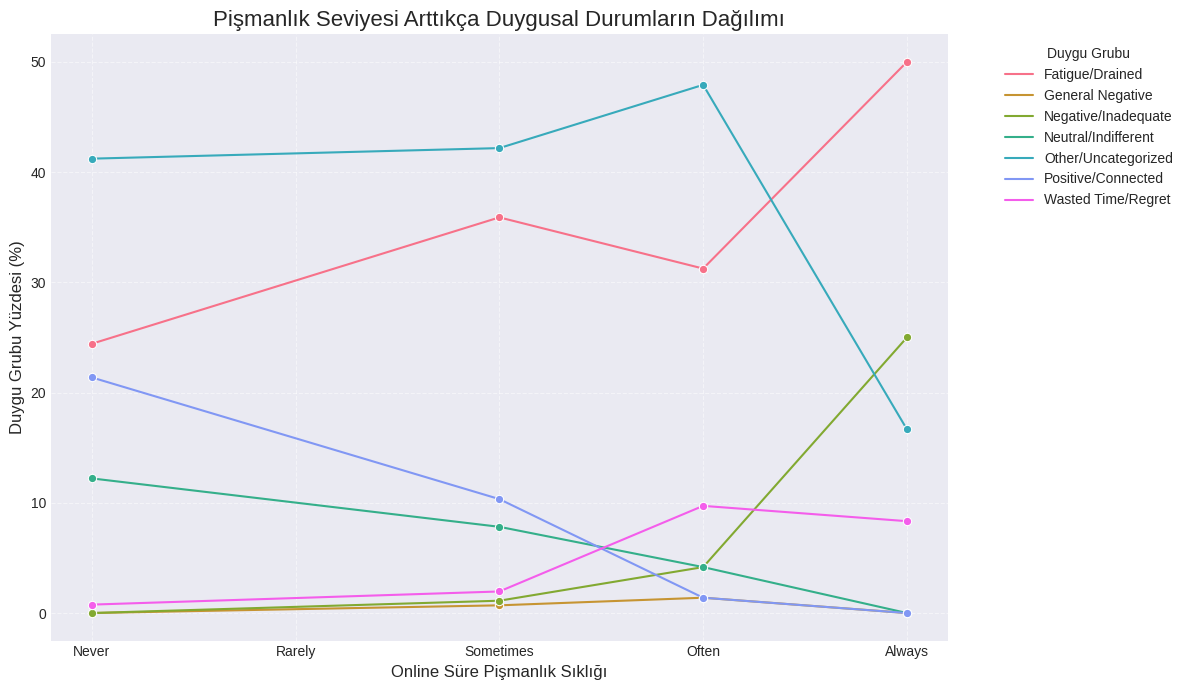

In [23]:
# Pişmanlık Seviyesi (Sayısal) → Duygusal Durum Dağılımı

regret_col_num = 'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day_numeric'
emotion_col = 'what_s_one_word_that_best_describes_how_you_feel_after_long_periods_online_grouped'

# Güvenlik kontrolü
missing_cols = [c for c in [regret_col_num, emotion_col] if c not in df.columns]
if missing_cols:
    raise ValueError(f" Eksik sütun(lar): {missing_cols}")

# 1. Sayısal pişmanlık → etiket eşlemesi
regret_label_map = {
    1: 'Never',
    2: 'Rarely',
    3: 'Sometimes',
    4: 'Often',
    5: 'Always'
}

df['regret_label'] = df[regret_col_num].map(regret_label_map)

#  Yüzdelik çapraz tablo
crosstab_pct = pd.crosstab(
    df['regret_label'],
    df[emotion_col],
    normalize='index'
) * 100

regret_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
crosstab_pct = crosstab_pct.reindex(regret_order)

#  Çizgi grafik formatı
plot_data = crosstab_pct.reset_index().melt(
    id_vars='regret_label',
    var_name='Duygu Grubu',
    value_name='Yüzde'
)

plt.figure(figsize=(12, 7))

sns.lineplot(
    data=plot_data,
    x='regret_label',
    y='Yüzde',
    hue='Duygu Grubu',
    marker='o'
)

plt.title('Pişmanlık Seviyesi Arttıkça Duygusal Durumların Dağılımı', fontsize=16)
plt.xlabel('Online Süre Pişmanlık Sıklığı', fontsize=12)
plt.ylabel('Duygu Grubu Yüzdesi (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Duygu Grubu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## 📉 Pişmanlık Seviyesi ve Duygusal Durum İlişkisi (Trend Analizi)

Bu kod, katılımcıların **çevrimiçi geçirilen süreden duydukları pişmanlık sıklığı** ile **uzun süre çevrimiçi kaldıktan sonra hissettikleri duygusal durumlar** arasındaki ilişkiyi inceler. Veriyi yüzdelik bazda normalize ederek, pişmanlık arttıkça hangi duyguların baskın hale geldiğini ortaya koyar.

### 🛠️ Uygulanan Analiz Adımları

1.  **Sayısal Veriyi Anlamlandırma:** Sayısallaştırılmış pişmanlık skorları (1-5), grafik üzerinde kolay okunması için orijinal metin etiketlerine ('Never' $\rightarrow$ 'Always') geri eşlenir.
2.  **Yüzdelik Çapraz Tablo (Normalization):** `pd.crosstab` ile her pişmanlık düzeyi için duygu gruplarının dağılımı hesaplanır. `normalize='index'` parametresi sayesinde, her pişmanlık kategorisindeki toplam katılımcı sayısı 100 kabul edilerek **yüzdelik oranlar** elde edilir.
3.  **Trend Görselleştirmesi (Line Plot):** Duygu gruplarının yüzdeleri, pişmanlık seviyesi boyunca birer çizgi olarak grafiğe aktarılır.

### 💎 Analitik Katkısı



* **Dinamik Değişim:** Pişmanlık seviyesi "Hiç"ten "Her Zaman"a doğru ilerledikçe, örneğin "Positive/Connected" duyguların azalma, "Fatigue/Drained" veya "Negative/Inadequate" duyguların artma eğilimi net bir şekilde gözlemlenebilir.
* **Normalize Edilmiş Kıyaslama:** Her grubun kendi içindeki dağılımı incelendiği için, katılımcı sayısının az olduğu uç gruplar (Örn: 'Never') dahi genel eğilimle sağlıklı bir şekilde kıyaslanabilir.
* **Kritik Eşik Tespiti:** Duyguların hangi pişmanlık noktasından sonra (Örn: 'Sometimes' sonrası) keskin bir kırılma yaşadığı bu grafik üzerinden kolayca okunur.

---
**Sonuç:** Bu analiz, pişmanlık hissinin duygusal iyi oluş üzerindeki etkisini bir "geçiş matrisi" olarak sunar.

 'age' sütunu tipi artık: int64
------------------------------------------------------------


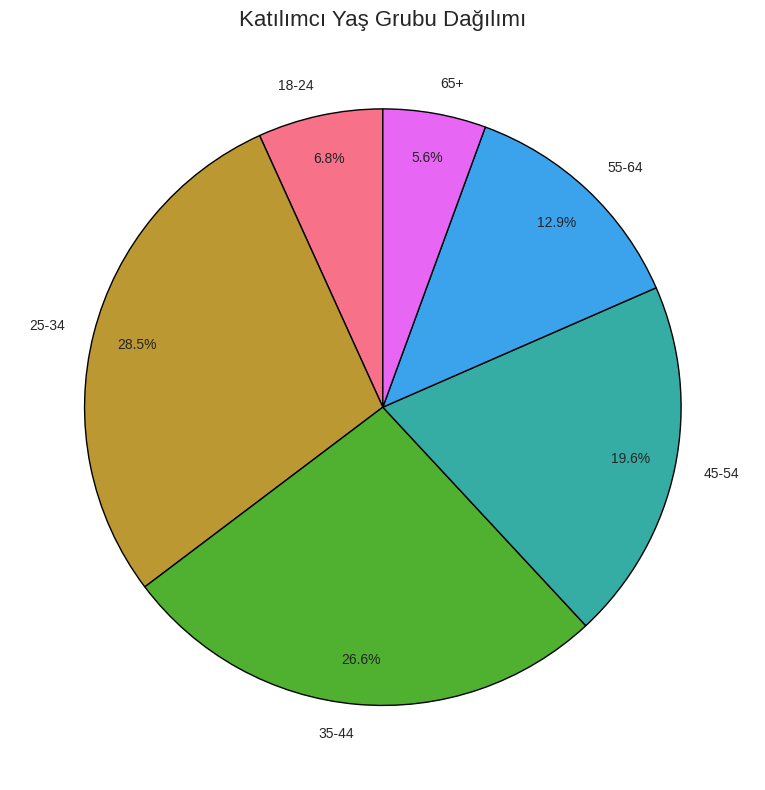

In [24]:

# Önceki temizlik adımlarınızdan hatırlanan Age sütunundaki özel değerleri temizleme
df['age'] = df['age'].replace(['None', 'Not Applicable'], np.nan)

# Age sütununu sayısal tipe zorlama. Dönüştürülemeyen değerleri NaN yapar.
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Yaş grubuna ayırmadan önce hala eksik kalan (NaN olan) yaşları doldurmak.
if df['age'].isnull().sum() > 0:
    median_age = df['age'].median()
    df['age'].fillna(median_age, inplace=True)
    print(f"➡️ Kalan {df['age'].isnull().sum()} eksik yaş değeri medyan ({median_age}) ile dolduruldu.")

print(f" 'age' sütunu tipi artık: {df['age'].dtype}")
print("-" * 60)


# Yaş gruplarını tanımla
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# pd.cut artık sayısal verilerle çalışabilir
df['age_group_custom'] = pd.cut(
    df['age'],
    bins=bins,
    labels=labels,
    right=False
)

# Yaş grubu dağılımı
age_dist = df['age_group_custom'].value_counts().sort_index()

# Pie chart 
plt.figure(figsize=(8, 8))
plt.pie(
    age_dist,
    labels=age_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.85
)
plt.title('Katılımcı Yaş Grubu Dağılımı', fontsize=16)
plt.tight_layout()
plt.show()



### 📊 Demografik Analiz: Yaş Grubu Dağılımı

Bu adımda, temizlenmiş veri seti kullanılarak katılımcılar
yaş aralıklarına göre gruplandırılmıştır.

Amaç:
- Yaş dağılımını görsel olarak incelemek
- Demografik yapıyı daha anlaşılır hale getirmek

Yaş grupları literatürde yaygın kullanılan aralıklara göre
manuel olarak tanımlanmıştır.


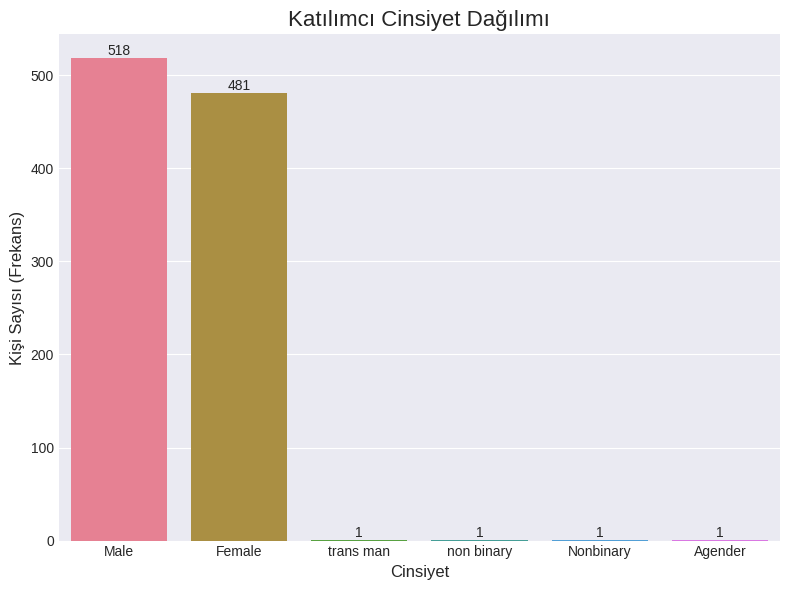

In [25]:
# Cinsiyet Dağılımı (Bar Plot)

gender_dist = df['what_is_your_gender'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=gender_dist.index,
    y=gender_dist.values
)

# Çubukların üzerine frekans değerlerini ekle
for i, count in enumerate(gender_dist.values):
    plt.text(
        i,
        count,
        str(count),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Katılımcı Cinsiyet Dağılımı', fontsize=16)
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Kişi Sayısı (Frekans)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### 📊 Demografik Analiz: Cinsiyet Dağılımı

Bu adımda, veri setindeki katılımcıların
cinsiyet dağılımı frekans bazında incelenmiştir.

Bar grafik tercih edilme nedeni:
- Kategori isimlerinin okunabilirliğini korumak
- Frekans karşılaştırmasını netleştirmek
* **Amaç:** Katılımcıların `what_is_your_gender` sütunundaki beyanlarına göre dağılımını gösterir.
* **Önem:** Örneklemdeki cinsiyet dengesini gösterir.

Grafik, veri setinin demografik dengesini
görsel olarak değerlendirmeyi amaçlamaktadır.


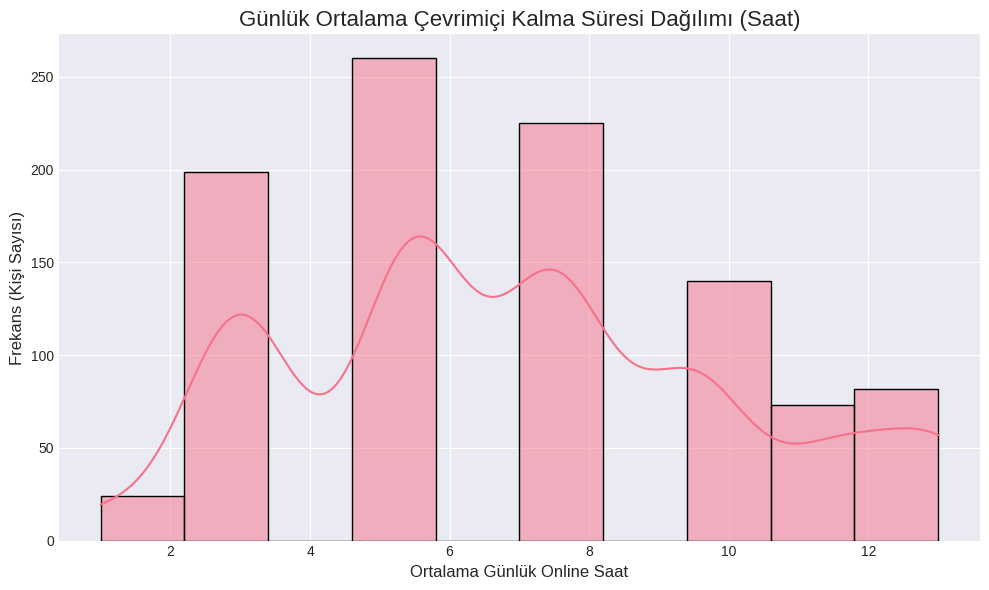

In [26]:
# 5.1 Günlük Ortalama Online Süre Dağılımı (Histogram)

plt.figure(figsize=(10, 6))
sns.histplot(
    df['avg_daily_hours_online_numeric'],
    bins=10,
    kde=True
)

plt.title('Günlük Ortalama Çevrimiçi Kalma Süresi Dağılımı (Saat)', fontsize=16)
plt.xlabel('Ortalama Günlük Online Saat', fontsize=12)
plt.ylabel('Frekans (Kişi Sayısı)', fontsize=12)

plt.tight_layout()
plt.show()



# 📊 Günlük Çevrimiçi Süre Dağılımı (Histogram & KDE)

Bu görselleştirme, katılımcıların bir gün içerisinde ortalama kaç saatlerini internette geçirdiklerini göstererek veri setindeki **kullanım yoğunluğunu** analiz eder.

### 🛠️ Teknik Uygulama
* **Histogram:** Verileri belirli saat aralıklarına bölerek her aralıktaki kişi sayısını (frekans) sütunlarla gösterir.
* **KDE (Yoğunluk Eğrisi):** Sütunların üzerindeki çizgi, verinin dağılım trendini yumuşatarak yığılmanın hangi saat dilimlerinde olduğunu netleştirir.


### 💎 Analitik Katkısı
* **Kullanıcı Profili:** Örneklemin çoğunluğunun **"normal"** kullanıcı mı yoksa **"yoğun"** kullanıcı mı olduğunu saptar.
* **Aykırı Değerler:** Günlük 12 saat ve üzeri online kalan uç grupların veri setindeki oranını görmemizi sağlar.

> **Not:** Grafik üzerindeki tepeler (peaks), kullanıcıların en çok hangi saat diliminde kümelendiğini gösterir.

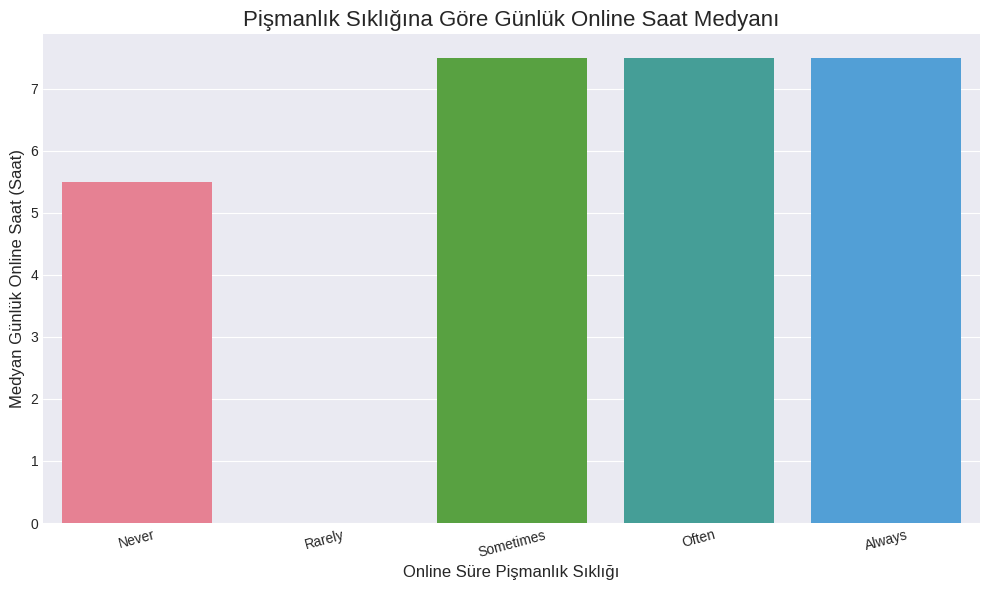

In [27]:

#  PİŞMANLIK ANALİZİ 

regret_numeric_col = 'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day_numeric'

reverse_regret_map = {1: 'Never', 2: 'Rarely', 3: 'Sometimes', 4: 'Often', 5: 'Always'}
df['regret_category'] = df[regret_numeric_col].map(reverse_regret_map)

regret_col_new = 'regret_category'
regret_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x=regret_col_new,
    y='avg_daily_hours_online_numeric',
    data=df,
    estimator=np.median, # Medyanı hesapla
    errorbar=None,
    order=regret_order
)

plt.title('Pişmanlık Sıklığına Göre Günlük Online Saat Medyanı', fontsize=16)
plt.xlabel('Online Süre Pişmanlık Sıklığı', fontsize=12)
plt.ylabel('Medyan Günlük Online Saat (Saat)', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



### ⏱️ Online Süre Pişmanlığına Göre Günlük Kullanım Analizi

Bu adımda, katılımcıların çevrimiçi geçirdikleri süreye dair
duydukları pişmanlık sıklığı ile günlük ortalama online süreleri
arasındaki ilişki incelenmiştir.

Analiz yaklaşımı:
- Pişmanlık sıklığı ordinal bir değişken olarak ele alınmıştır
- Aykırı değerlerin etkisini azaltmak için ortalama yerine
  **medyan günlük online süre** kullanılmıştır
 * **Beklenen Çıkarım:** Genellikle, dijital dünya hakkında daha endişeli olanların, bu dünyaya daha çok maruz kalması (daha yüksek online saat) beklenir (Farkındalık ve maruz kalma arasındaki ilişki).

Bu görselleştirme, algısal memnuniyet ile gerçek kullanım süresi
arasındaki ilişkiyi değerlendirmeyi amaçlamaktadır.


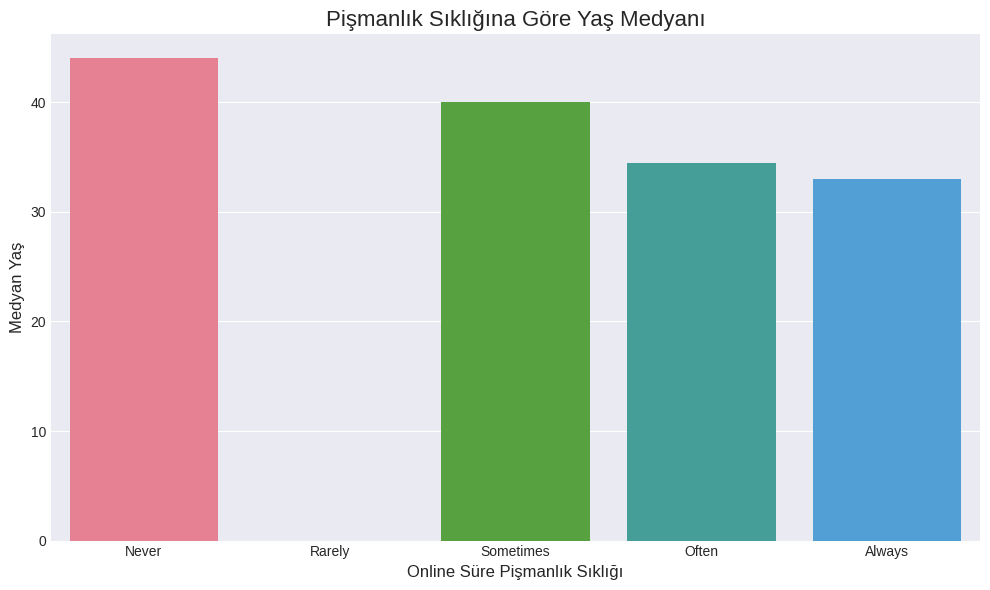

In [28]:

# PİŞMANLIK VE YAŞ ANALİZİ 

# Sayısal Sütunu Bulma
regret_numeric_col = 'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day_numeric'

reverse_regret_map = {1: 'Never', 2: 'Rarely', 3: 'Sometimes', 4: 'Often', 5: 'Always'}
df['regret_category'] = df[regret_numeric_col].map(reverse_regret_map)

regret_col_new = 'regret_category'
regret_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

required_cols = [regret_col_new, 'age']

plt.figure(figsize=(10, 6))
sns.barplot(
    x=regret_col_new, # Yeni kategorik sütunu kullan
    y='age',
    data=df,
    estimator=np.median,
    errorbar=None,
    order=regret_order
)

plt.title('Pişmanlık Sıklığına Göre Yaş Medyanı', fontsize=16)
plt.xlabel('Online Süre Pişmanlık Sıklığı', fontsize=12)
plt.ylabel('Medyan Yaş', fontsize=12)
plt.tight_layout()
plt.show()



### 📊 Pişmanlık Sıklığına Göre Yaş Dağılımı (Medyan)

Bu analizde, katılımcıların çevrimiçi geçirdikleri
zamandan duydukları pişmanlık sıklığı ile
yaşları arasındaki ilişki incelenmiştir.

Karşılaştırma ölçütü olarak uç değerlerden
etkilenmemesi nedeniyle **medyan yaş** kullanılmıştır.
* **Amaç:** Online geçirilen zamandan duyulan pişmanlık duygusunun farklı yaş grupları arasında nasıl dağıldığını (hangi yaşın daha çok pişman olduğunu) gösterir.
* **Beklenen Çıkarım:** **"Often" / "Always"** pişmanlık kategorilerindeki medyan yaşın, **"Never" / "Rarely"** kategorilerine göre daha genç olması beklenir. Bu, genç yaş grubunun dijital alışkanlıkları konusunda daha fazla pişmanlık duyduğunu gösterir.


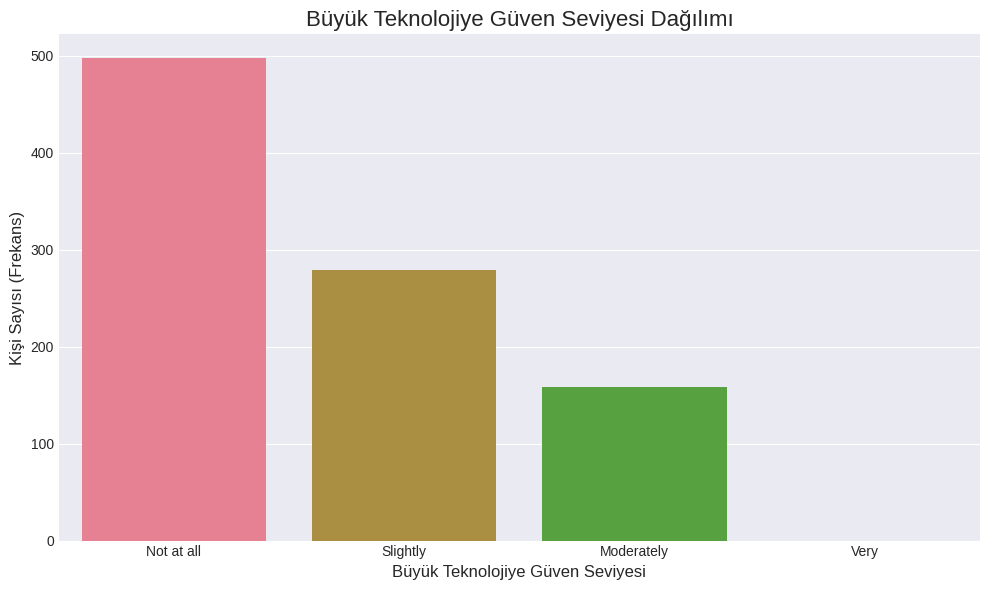

In [29]:

#  GÜVEN İLİŞKİSİ ANALİZİ 

# 1. KULLANILACAK SÜTUNLARIN NUMERİK KARŞILIKLARI
trust_big_tech_numeric_col = 'do_you_trust_big_tech_companies_to_use_ai_responsibly_numeric'


trust_map_rev = {1: 'Not at all', 2: 'Slightly', 3: 'Moderately', 4: 'Very', 5: 'Extremely'} 

# **Ancak Tanımlayıcı İstatistiklerinizde Max değer 4 olduğu için, 5'i hariç tutuyoruz.**
trust_map_rev_safe = {1: 'Not at all', 2: 'Slightly', 3: 'Moderately', 4: 'Very'}
df['trust_big_tech_cat'] = df[trust_big_tech_numeric_col].map(trust_map_rev_safe)

plt.figure(figsize=(10, 6))
sns.countplot(
    x='trust_big_tech_cat',
    data=df,
    order=['Not at all', 'Slightly', 'Moderately', 'Very']
)

plt.title('Büyük Teknolojiye Güven Seviyesi Dağılımı', fontsize=16)
plt.xlabel('Büyük Teknolojiye Güven Seviyesi', fontsize=12)
plt.ylabel('Kişi Sayısı (Frekans)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### 🤝 Güven Analizi: Büyük Teknoloji ve İçerik Uyumu

Bu adımda, katılımcıların büyük teknoloji şirketlerine
duydukları güven seviyesi ile, içeriğin kişisel değerlerle
uyumlu olmasının güven algısı üzerindeki etkisi birlikte incelenmiştir.

Kullanılan yaklaşım:
- İki kategorik değişkenin frekans bazlı karşılaştırılması
- Grup bazlı çubuk grafik (grouped bar plot)

Bu analiz, kurumsal güven ile içerik algısı arasındaki
ilişkisel örüntüleri görsel olarak ortaya koymayı amaçlamaktadır.


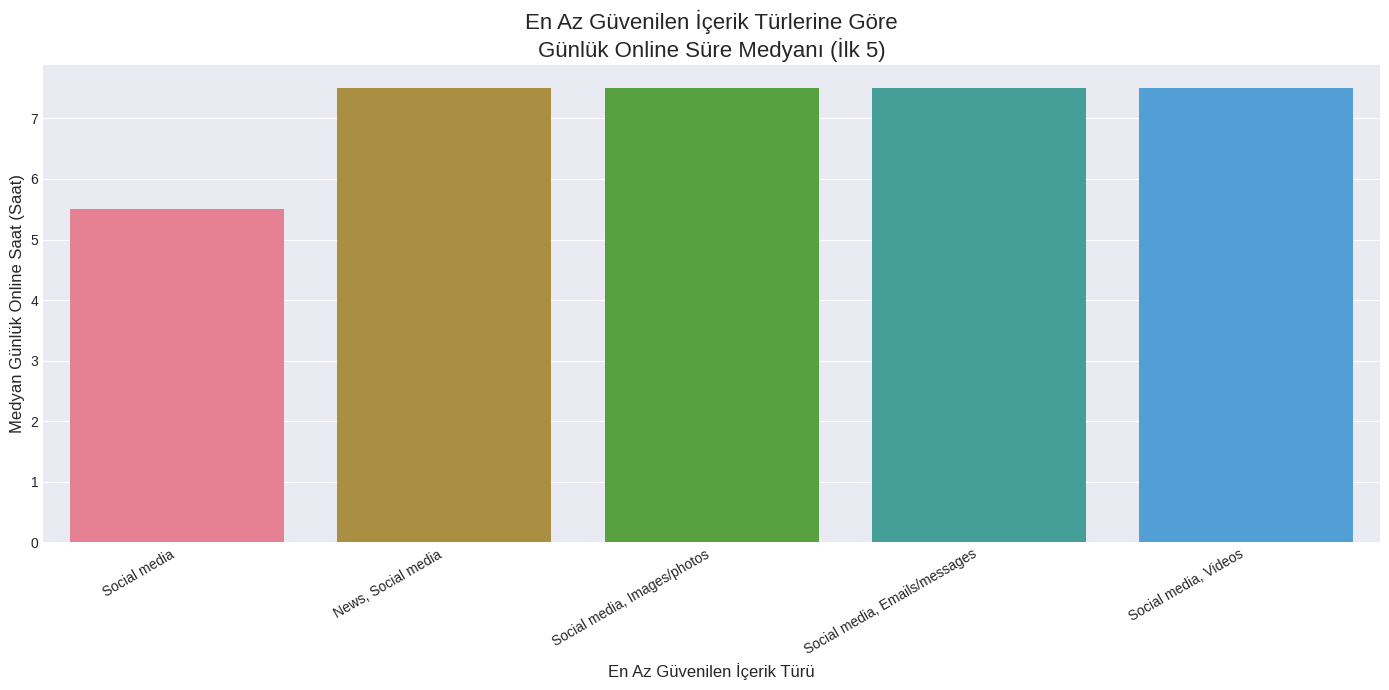

In [30]:
#  En Az Güvenilen İçerik Türü ve Online Süre ---

trust_col = 'which_types_of_online_content_do_you_trust_the_least___select_up_to_2'
hours_col = 'on_average__how_many_hours_do_you_spend_online_each_day___self_estimate'

# Gerekli kolon yoksa sadece burada üret
if 'avg_daily_hours_online_numeric' not in df.columns:
    time_map = {
        'Less than 2 hours': 1,
        '2 - 4 hours': 3,
        '5 - 6 hours': 5.5,
        '7 - 8 hours': 7.5,
        '9 - 10 hours': 9.5,
        '11 - 12 hours': 11.5,
        'More than 12 hours': 13
    }
    df['avg_daily_hours_online_numeric'] = df[hours_col].map(time_map)

# Çoklu seçimleri ayır
trust_exploded = (
    df[[trust_col, 'avg_daily_hours_online_numeric']]
    .dropna()
    .assign(trust_type=lambda x: x[trust_col].str.split(';'))
    .explode('trust_type')
)

trust_exploded['trust_type'] = trust_exploded['trust_type'].str.strip()

# En sık seçilen ilk 5 içerik
top_5_untrusted = (
    trust_exploded['trust_type']
    .value_counts()
    .head(5)
    .index
)

plt.figure(figsize=(14, 7))
sns.barplot(
    x='trust_type',
    y='avg_daily_hours_online_numeric',
    data=trust_exploded[trust_exploded['trust_type'].isin(top_5_untrusted)],
    estimator=np.median,
    errorbar=None
)

plt.title(
    'En Az Güvenilen İçerik Türlerine Göre\n'
    'Günlük Online Süre Medyanı (İlk 5)',
    fontsize=16
)
plt.xlabel('En Az Güvenilen İçerik Türü', fontsize=12)
plt.ylabel('Medyan Günlük Online Saat (Saat)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()



### 🚫 En Az Güvenilen İçerik Türleri ve Online Süre

Bu analizde, katılımcıların en az güvendikleri
online içerik türleri ile günlük online süreleri
arasındaki ilişki incelenmiştir.
* **Beklenen Çıkarım:** **"Social media"** gibi içeriklere en az güvenen kullanıcıların, diğer gruplara kıyasla **daha yüksek medyan online saat** değerine sahip olması beklenir. Bu, güvensizliğe rağmen tüketimin devam ettiğini (bir paradoksu) ortaya çıkarır.

Not:
Bu hücre, kernel sıfırlanması veya hücrelerin
bağımsız çalıştırılması durumuna karşı
gerekli sayısal sütunun varlığını kontrol eder.


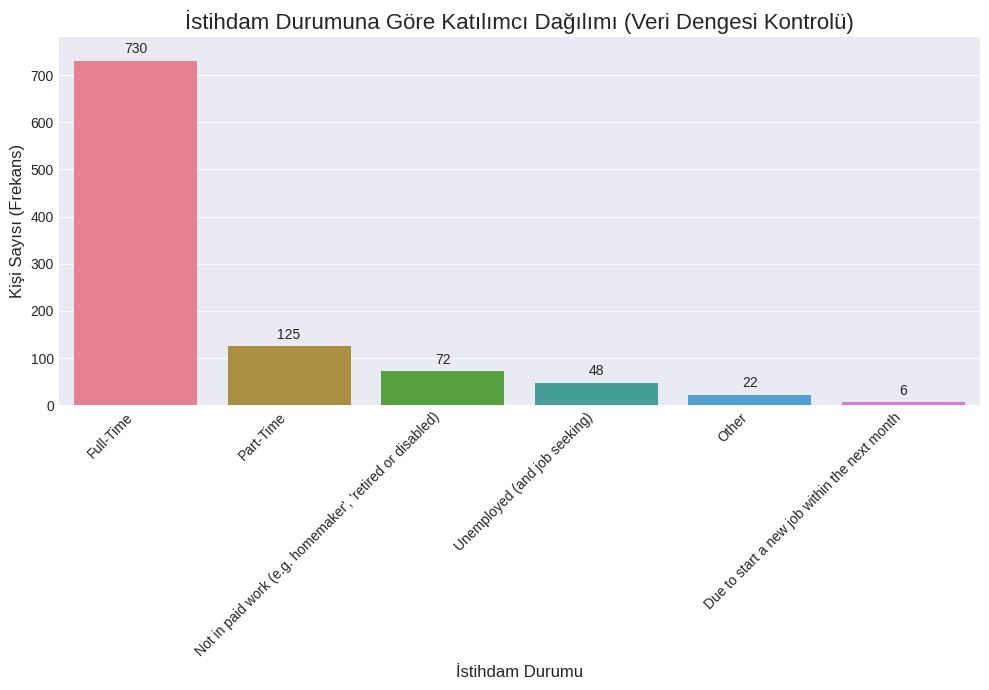

In [31]:
#  İstihdam Durumu Dağılımı (Veri Dengesi)

employment_col = 'employment_status'

# Kolon kontrolü + NaN temizliği
df_employment = df[[employment_col]].dropna()

employment_dist = df_employment[employment_col].value_counts()

plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x=employment_dist.index,
    y=employment_dist.values
)

# Çubuk üstü değer etiketleri
for i, count in enumerate(employment_dist.values):
    ax.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.title('İstihdam Durumuna Göre Katılımcı Dağılımı (Veri Dengesi Kontrolü)', fontsize=16)
plt.xlabel('İstihdam Durumu', fontsize=12)
plt.ylabel('Kişi Sayısı (Frekans)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, employment_dist.max() + 50)
plt.tight_layout()
plt.show()



### 📊 İstihdam Durumu Dağılımı (Veri Dengesi Kontrolü)

Bu grafik, katılımcıların İstihdam Durumlarına göre frekans dağılımını göstermektedir. Bu, veri setinizin dengeli olup olmadığını kontrol eden önemli bir adımdır.

Amaç:
- Veri setinde ciddi bir **sınıf dengesizliği** olup olmadığını görmek
- Sonraki analizler ve modelleme adımları için riskleri önceden belirlemek
  
Çıkarım:

- Grafiğe bakıldığında, **"Employed full-time"** kategorisinin diğer tüm kategorilerden çok daha yüksek bir frekansa sahip olduğu görülür. Bu, veri setinin bu değişken açısından **dengesiz (imbalanced)** olduğunu kanıtlar ve çıkarımların büyük ölçüde bu gruba özgü olabileceği anlamına gelir.

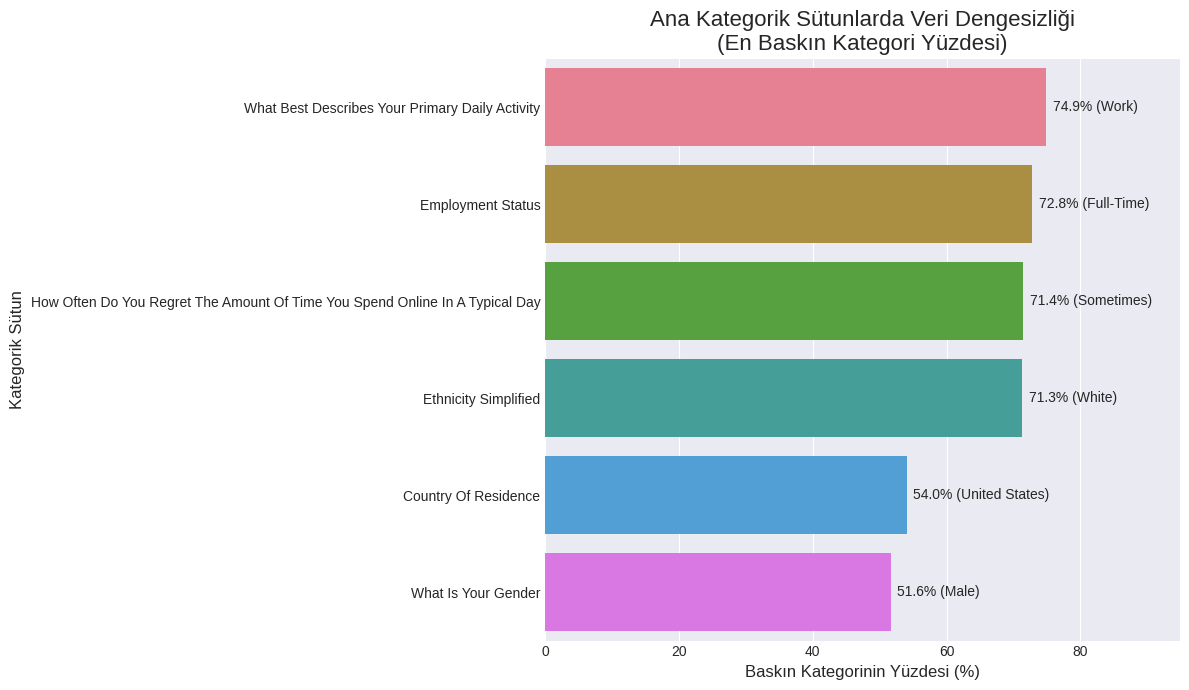

In [32]:
# Kategorik Sütunlarda Genel Dengesizlik Analizi 

# İncelenecek temel kategorik sütunlar
categorical_cols_for_analysis = [
    'what_is_your_gender',
    'employment_status',
    'ethnicity_simplified',
    'country_of_residence',
    'what_best_describes_your_primary_daily_activity',
    'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day'
]

imbalance_data = []
total_rows = len(df)

# En baskın kategori ve yüzdesini hesapla
for col in categorical_cols_for_analysis:
    # Sadece MEVCUT ve 'object' tipindeki sütunları analiz et
    if col in df.columns and df[col].dtype == object:
        value_counts = df[col].value_counts(dropna=True)
        # Sütun boş değilse veya tek bir kategori değilse devam et
        if not value_counts.empty and len(value_counts) > 0:
            dominant_value = value_counts.index[0]
            dominant_pct = (value_counts.iloc[0] / total_rows) * 100

            imbalance_data.append({
                'Sütun': col.replace('_', ' ').title(),
                'Baskın Kategori (%)': dominant_pct,
                'Baskın Kategori Adı': dominant_value
            })

imbalance_df = (
    pd.DataFrame(imbalance_data)
    .sort_values(by='Baskın Kategori (%)', ascending=False)
    .reset_index(drop=True)
)

# --- Görselleştirme ---
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='Baskın Kategori (%)',
    y='Sütun',
    data=imbalance_df
)

# Çubuk etiketleri
for i, row in imbalance_df.iterrows():
    ax.text(
        row['Baskın Kategori (%)'] + 1,
        i,
        f"{row['Baskın Kategori (%)']:.1f}% ({row['Baskın Kategori Adı']})",
        va='center',
        fontsize=10
    )

plt.title(
    'Ana Kategorik Sütunlarda Veri Dengesizliği\n(En Baskın Kategori Yüzdesi)',
    fontsize=16
)
plt.xlabel('Baskın Kategorinin Yüzdesi (%)', fontsize=12)
plt.ylabel('Kategorik Sütun', fontsize=12)

# X ekseni sınırını ayarlama
plt.xlim(0, imbalance_df['Baskın Kategori (%)'].max() + 20)

plt.tight_layout()
plt.show()

### 📊 Kategorik Sütunlarda Veri Dengesizliği Analizi

Bu adımda seçilen ana **kategorik değişkenlerde** en baskın kategorinin
toplam veri içindeki yüzdesi hesaplanmıştır.

Amaç:
- Ciddi **sınıf dengesizliklerini** tespit etmek
- Modelleme öncesi riskli değişkenleri belirlemek
- SMOTE / yeniden örnekleme gereksinimini değerlendirmek

Yorumlama:
- Her çubuk, o sütundaki **en sık görülen kategorinin toplam veri setindeki yüzdesini** temsil eder. Yüksek yüzde, o sütunun dengesiz olduğunu ve çıkarımların o baskın kategoriye eğilimli olabileceğini gösterir.


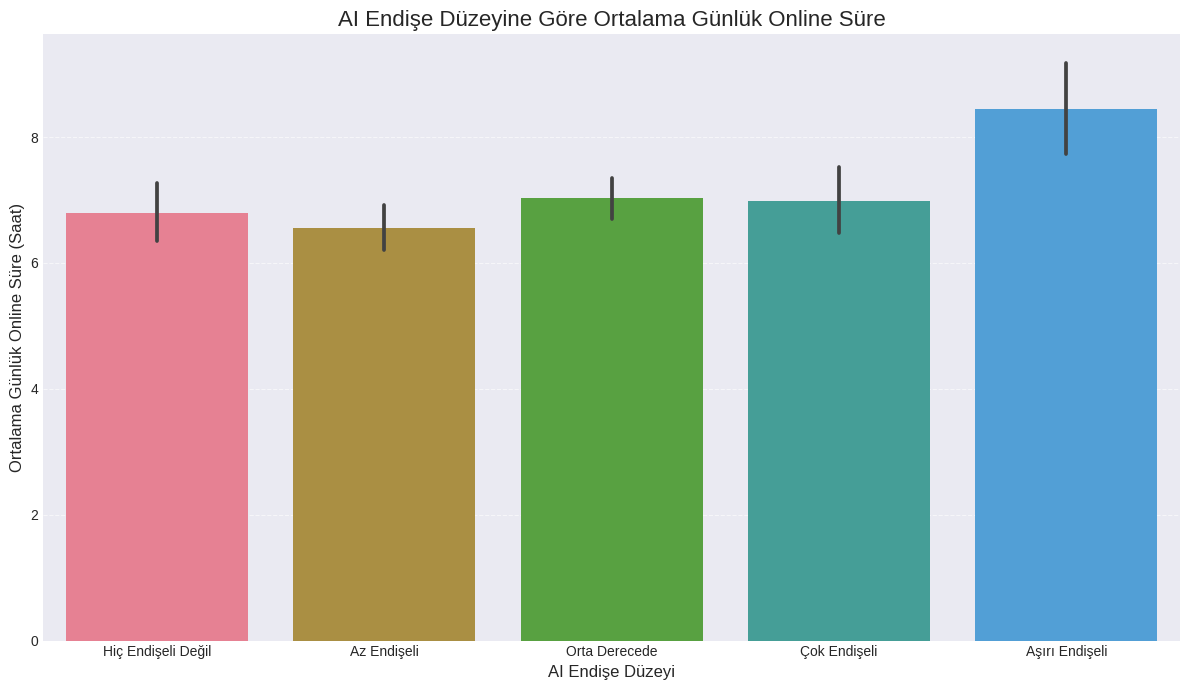

In [33]:


ai_worry_numeric_col = 'how_worried_are_you_that_ai_will_disrupt_your_own_life__e_g___your_job__studies__creativity__or_relationships_numeric'
online_hours_col = 'avg_daily_hours_online_numeric'

ai_worry_map_rev = {
    1: 'Hiç Endişeli Değil',
    2: 'Az Endişeli',
    3: 'Orta Derecede',
    4: 'Çok Endişeli',
    5: 'Aşırı Endişeli'
}

df['ai_worry_category'] = df[ai_worry_numeric_col].map(ai_worry_map_rev)

ai_worry_order = [
    'Hiç Endişeli Değil',
    'Az Endişeli',
    'Orta Derecede',
    'Çok Endişeli',
    'Aşırı Endişeli'
]

plt.figure(figsize=(12, 7))

sns.barplot(
    data=df.dropna(subset=['ai_worry_category', online_hours_col]),
    x='ai_worry_category',
    y=online_hours_col,
    order=ai_worry_order,
    errorbar=('ci', 95)  # %95 güven aralığı
)

plt.title(
    'AI Endişe Düzeyine Göre Ortalama Günlük Online Süre',
    fontsize=16
)
plt.xlabel('AI Endişe Düzeyi', fontsize=12)
plt.ylabel('Ortalama Günlük Online Süre (Saat)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## 📊 AI Endişe Düzeyi ve Ortalama Çevrimiçi Süre Analizi (Çubuk Grafik)

Bu kod, katılımcıların **Yapay Zeka'nın yaşamlarını (iş, eğitim, yaratıcılık vb.) bozma endişesi** ile **günlük ortalama çevrimiçi geçirdikleri süre** arasındaki ilişkiyi merkezi eğilim bazında inceler. Kutu grafiğinden (box plot) farklı olarak, burada doğrudan **ortalama değerlere** ve bu değerlerin istatistiksel güvenilirliğine odaklanılır.

### 🛠️ Uygulanan Görselleştirme Stratejisi

1.  **Kategorik Eşleme:** Sayısal skorlar (1-5), anketin orijinal doğasına sadık kalarak 'Hiç Endişeli Değil'den 'Aşırı Endişeli'ye kadar anlamlı etiketlere dönüştürülür.
2.  **Hata Çubukları (Confidence Intervals):** `errorbar=('ci', 95)` parametresi kullanılarak grafik üzerine ince çizgiler eklenir. Bu çizgiler, hesaplanan ortalamanın **%95 güven aralığını** temsil eder.
    * *Kısa çubuklar:* Verilerin ortalama etrafında daha tutarlı (düşük varyans) olduğunu gösterir.
    * *Uzun çubuklar:* O gruptaki katılımcı cevaplarının daha değişken olduğunu gösterir.
3.  **Sıralı Karşılaştırma:** Veriler `ai_worry_order` listesine göre sıralanarak, endişe düzeyi arttıkça çevrimiçi sürenin nasıl bir trend izlediği (artış, azalış veya sabit kalma) net bir şekilde sunulur.

### 💎 Analitik Katkısı



* **Grup Karşılaştırması:** Farklı endişe seviyelerine sahip grupların internet kullanım alışkanlıkları arasındaki farkların istatistiksel olarak anlamlı olup olmadığını anlamamıza yardımcı olur.
* **Özet Görünüm:** Kutu grafiğine göre daha yalın bir görünüm sunarak, "ortalama bir kullanıcının" endişe düzeyine göre profili hakkında hızlı bilgi verir.



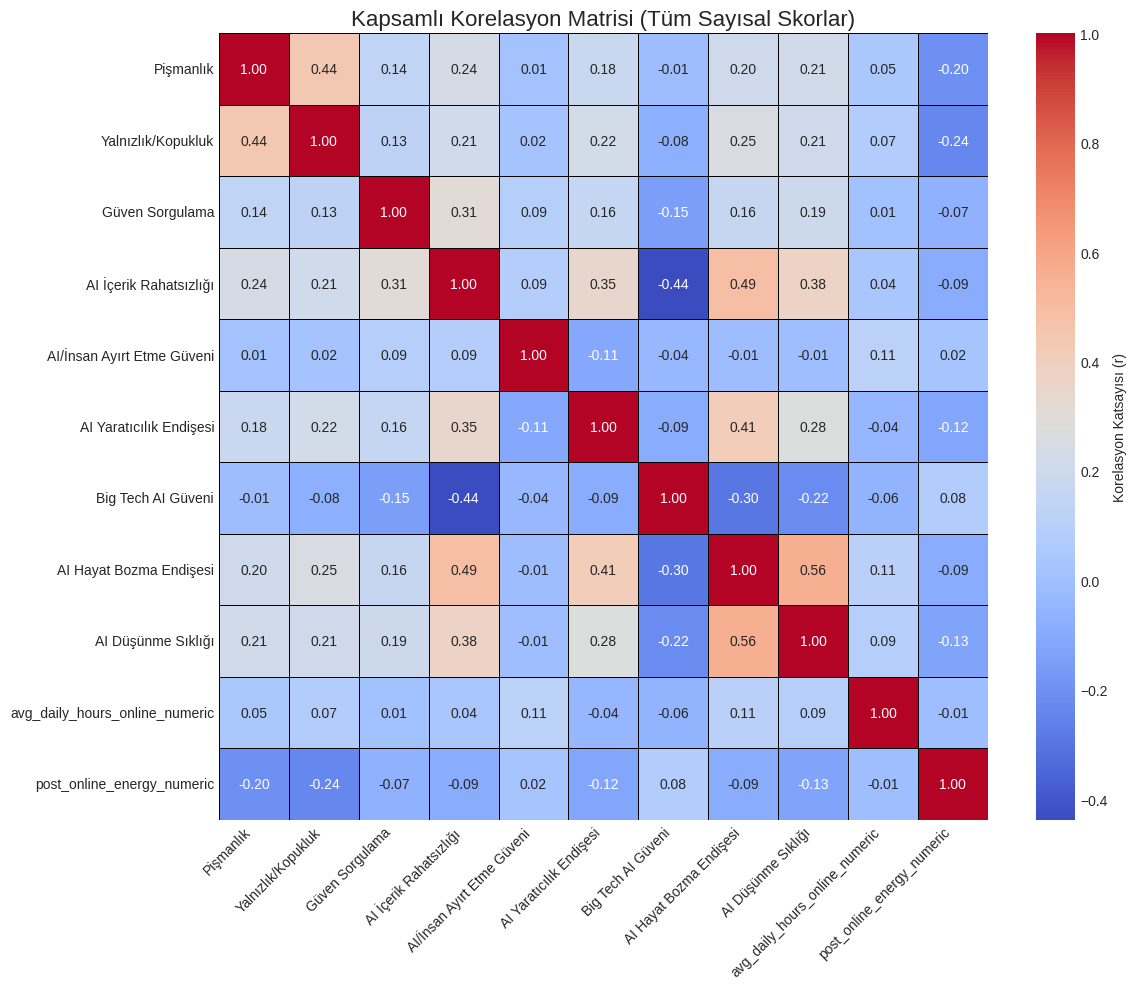

In [34]:


# Kapsamlı Korelasyon Matrisi için kullanılacak sütun adlarının kısaltılması (Önceki Adımdan Devam)
def shorten_col_name(col_name):
    mapping = {
        'how_often_do_you_regret_the_amount_of_time_you_spend_online_in_a_typical_day': 'Pişmanlık',
        'how_often_do_you_feel_lonely_or_disconnected_after_spending_time_online': 'Yalnızlık/Kopukluk',
        'how_often_do_you_question_whether_online_content_is_real_or_trustworthy': 'Güven Sorgulama',
        'how_much_does_it_bother_you_if_the_content_you_consume_online_isn_t_created_by_a_real_person__but_is_generated_by_ai_to_keep_you_engaged_or_influence_your_decisions': 'AI İçerik Rahatsızlığı',
        'how_confident_are_you_that_you_can_tell_the_difference_between_human_created_content_and_ai_generated_content': 'AI/İnsan Ayırt Etme Güveni',
        'do_you_worry_that_ai_will_make_human_creativity_less_valued': 'AI Yaratıcılık Endişesi',
        'do_you_trust_big_tech_companies_to_use_ai_responsibly': 'Big Tech AI Güveni',
        'how_worried_are_you_that_ai_will_disrupt_your_own_life__e_g___your_job__studies__creativity__or_relationships': 'AI Hayat Bozma Endişesi',
        'how_often_do_you_think_about_the_implications_of_ai_on_your_daily_life': 'AI Düşünme Sıklığı',
        'avg_daily_hours_online_numeric': 'Online Saat (Günlük)',
        'post_online_energy_numeric': 'Online Sonrası Enerji'
    }
    return mapping.get(col_name.replace('_numeric', ''), col_name)

# Sayısal skor sütunlarını seçme
numeric_score_cols = [col for col in df.columns if col.endswith('_numeric')]

# Korelasyon matrisini hesaplama
correlation_matrix = df[numeric_score_cols].corr(method='pearson')

# Matris için kısaltılmış adları kullanma
correlation_matrix.columns = [shorten_col_name(col) for col in correlation_matrix.columns]
correlation_matrix.index = [shorten_col_name(col) for col in correlation_matrix.index]

# Isı Haritasını Çizme
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Korelasyon Katsayısı (r)'},
    linewidths=.5,
    linecolor='black'
)
plt.title('Kapsamlı Korelasyon Matrisi (Tüm Sayısal Skorlar)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 🌡️ Kapsamlı Korelasyon Matrisi ve Isı Haritası

Bu kod, veri setindeki tüm **sayısallaştırılmış skor sütunları** arasındaki doğrusal ilişkileri (korelasyonları) hesaplar ve sonuçları görselleştirmek için bir **Isı Haritası (Heatmap)** oluşturur.

### Yapılan İşlemler

1.  **Sütun Adı Kısaltma (`shorten_col_name`):** Uzun ve karmaşık anket soru adları, ısı haritasının okunabilirliğini artırmak için Türkçe ve anlaşılır kısa etiketlere (Örn: 'Pişmanlık', 'AI Güveni') dönüştürülür.
2.  **Korelasyon Hesaplaması:** Seçilen sayısal sütunlar arasında **Pearson Korelasyon Katsayısı** hesaplanır (`df[...].corr()`).
    * **Pearson Katsayısı ($r$):** Değerler $-1$ (Güçlü Negatif İlişki) ile $+1$ (Güçlü Pozitif İlişki) arasında değişir.
3.  **Isı Haritası (Heatmap) Görselleştirmesi:** Hesaplanan korelasyon matrisi bir ısı haritasına dönüştürülür.
    * **Renkler:** Genellikle Kırmızı tonları **Pozitif** ilişkileri, Mavi tonları ise **Negatif** ilişkileri temsil eder.
    * **Etiketler:** Her hücre içindeki `.2f` formatındaki sayı, ilgili iki değişken arasındaki korelasyon katsayısını gösterir.

### Amaç

Bu görselleştirme, katılımcıların sosyal medyaya ilişkin olumsuz deneyimleri (Pişmanlık, Yalnızlık) ile Yapay Zeka konusundaki tutumları (Endişe, Güven) ve çevrimiçi geçirdikleri süre gibi faktörler arasında **hangi ilişkilerin güçlü, hangilerinin zayıf** olduğunu hızlı ve sezgisel bir şekilde belirlemeyi sağlar.